In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('user_data_anonymized.csv')
df = df.drop([df.columns[0]],axis=1)

In [3]:
df.head()

user_id username     acc_x     acc_y     acc_z    gyro_x    gyro_y  \
0        0   User_1  0.032867 -0.011398 -0.989441  0.001340 -0.004726   
1        0   User_1  0.036270 -0.646866 -0.749863  0.001340 -0.004726   
2        0   User_1  0.036270 -0.646866 -0.749863  0.001340 -0.004726   
3        0   User_1 -0.061005 -0.691040 -0.748917  0.320133  0.039149   
4        0   User_1 -0.140427 -0.746765 -0.741333  0.381414  0.046364   

     gyro_z  type  ntrial                timestamp  
0  0.000653     0       3  2018-03-15 21:49:02.853  
1  0.000653     0       3  2018-03-15 21:49:02.876  
2  0.000653     0       3  2018-03-15 21:49:02.903  
3 -0.234852     0       3  2018-03-15 21:49:03.052  
4 -0.343133     0       3  2018-03-15 21:49:03.074

User_1


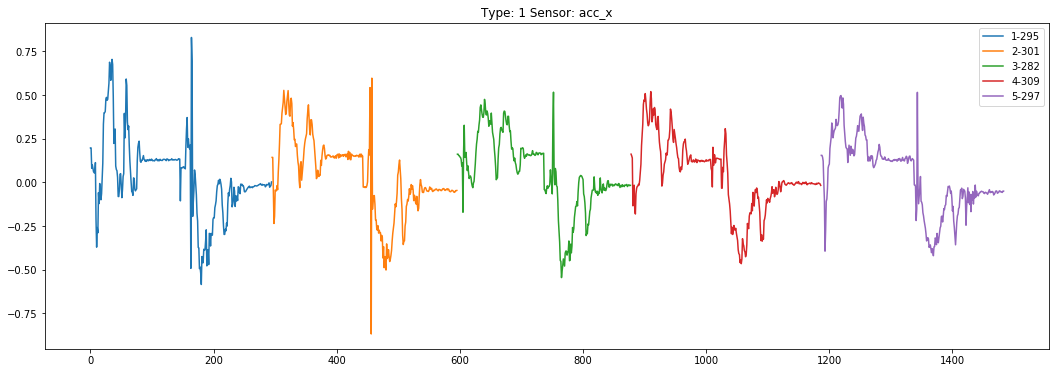

User_1


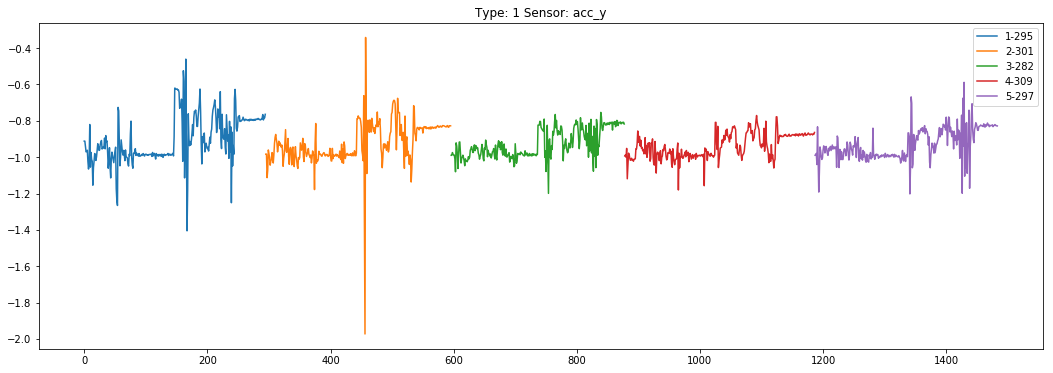

User_1


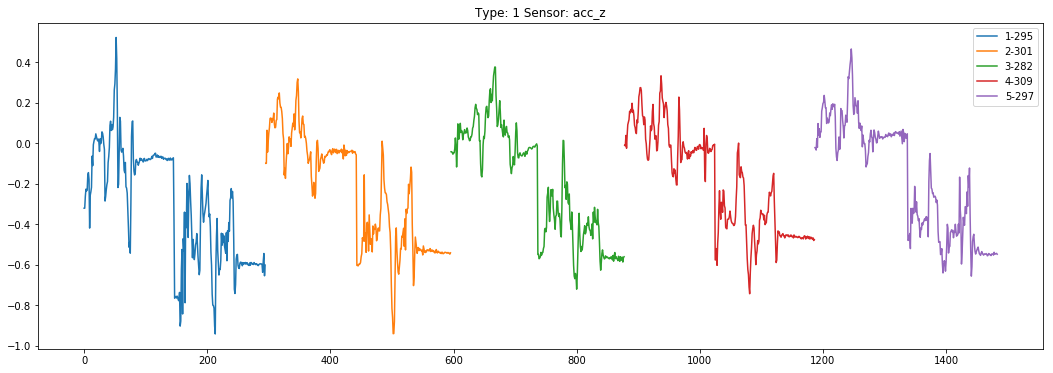

User_1


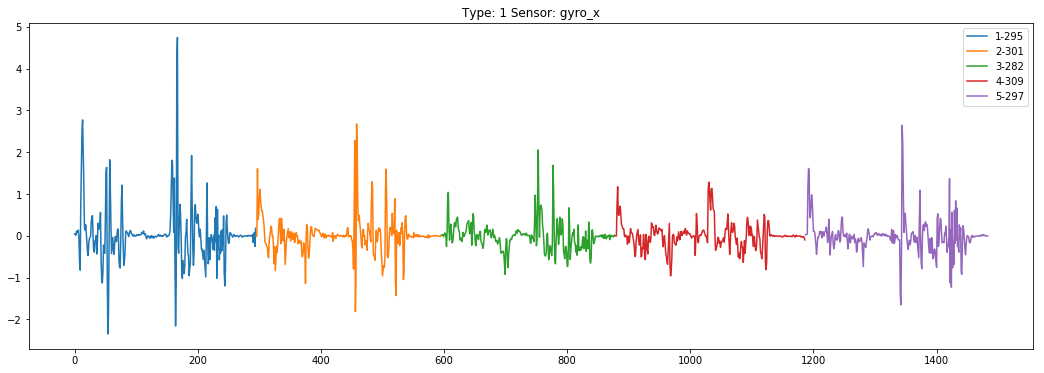

User_1


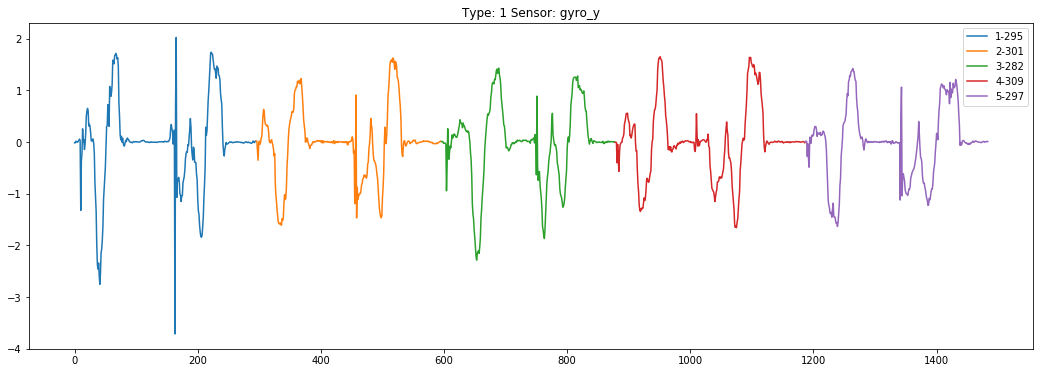

User_1


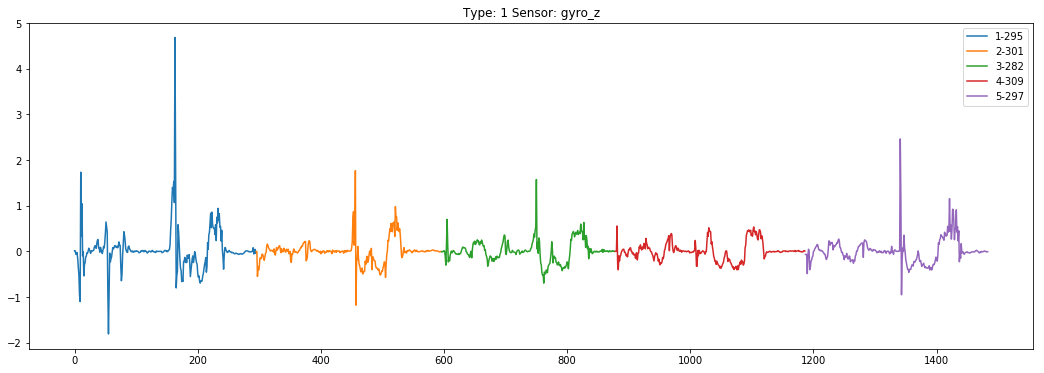

User_1


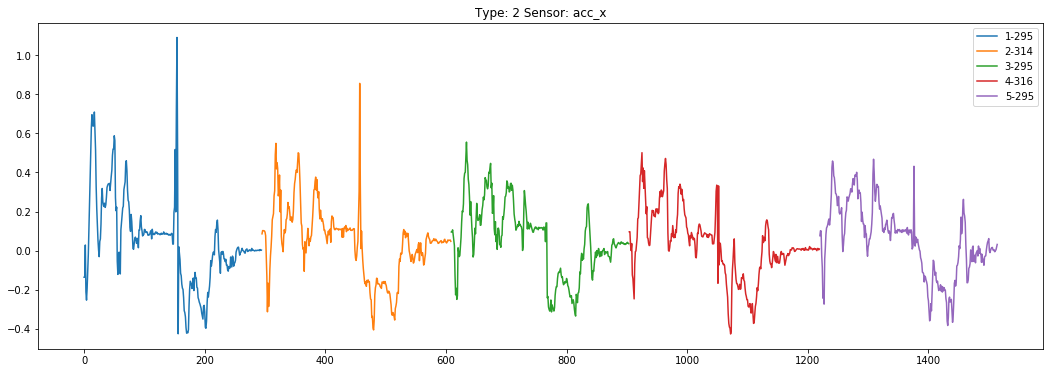

User_1


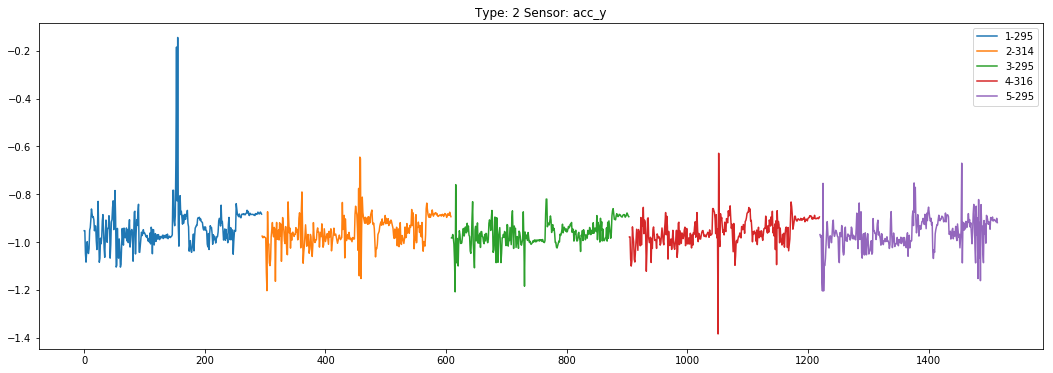

User_1


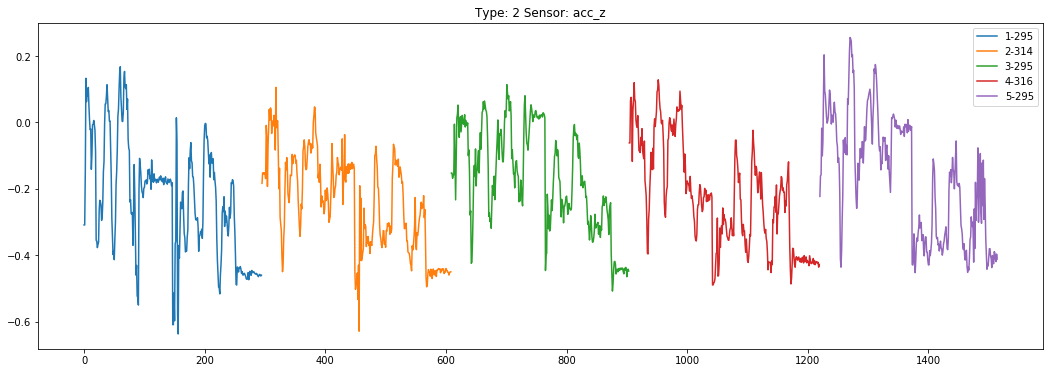

User_1


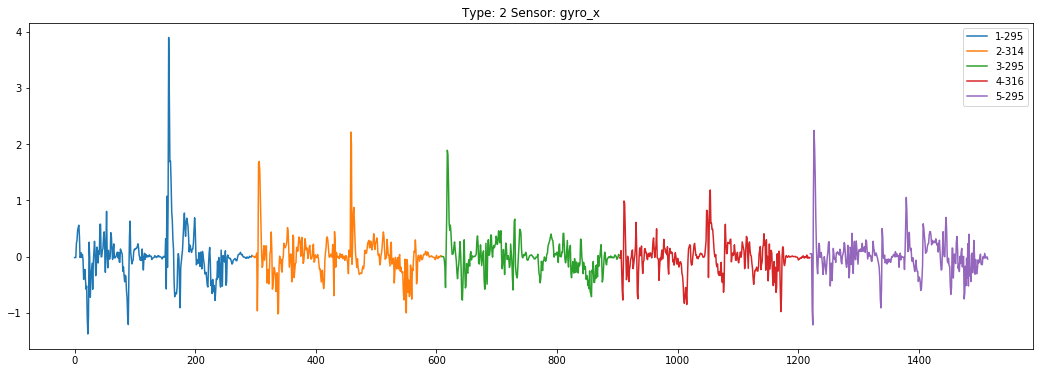

User_1


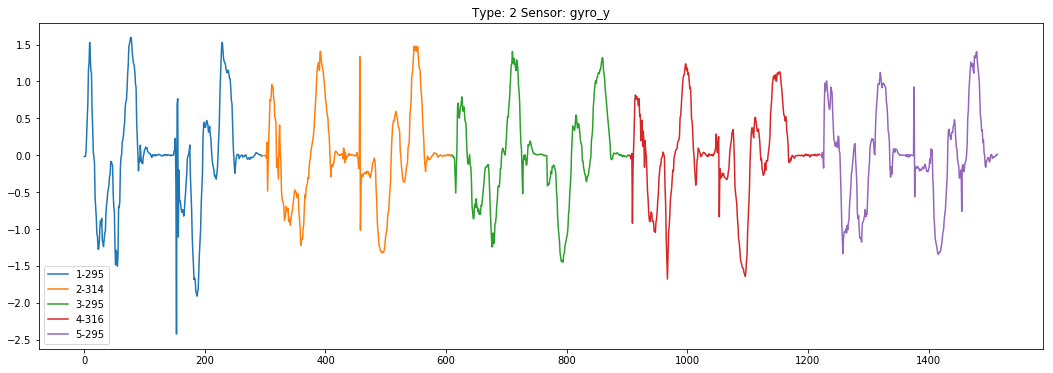

User_1


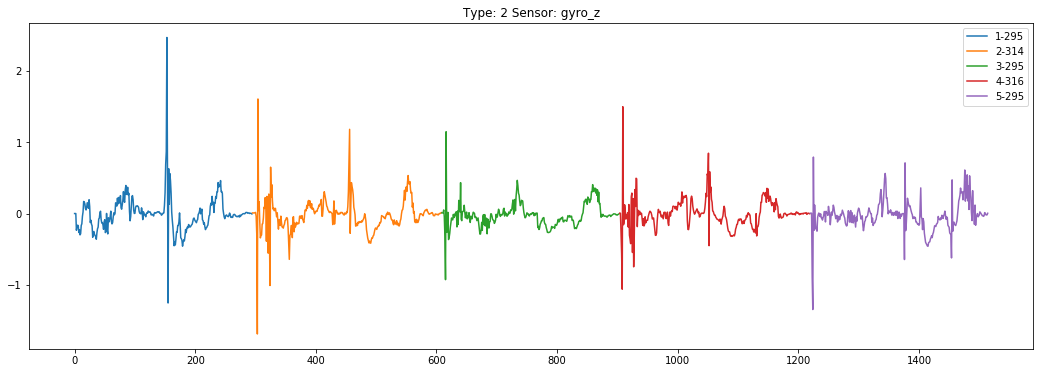

User_1


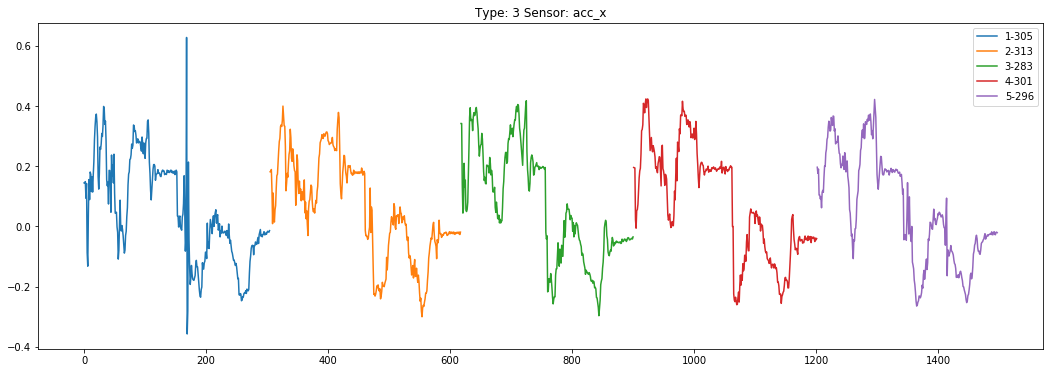

User_1


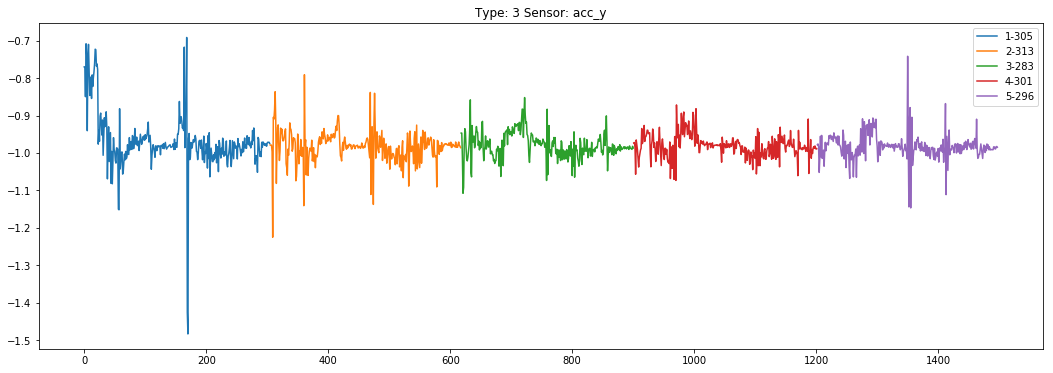

User_1


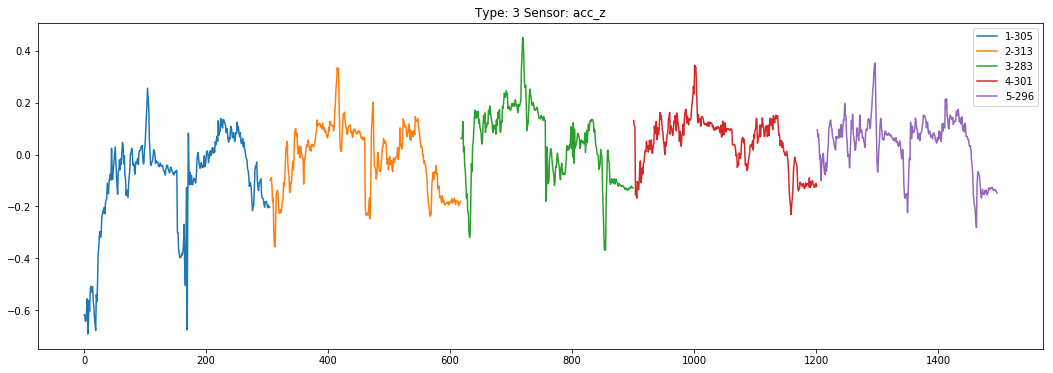

User_1


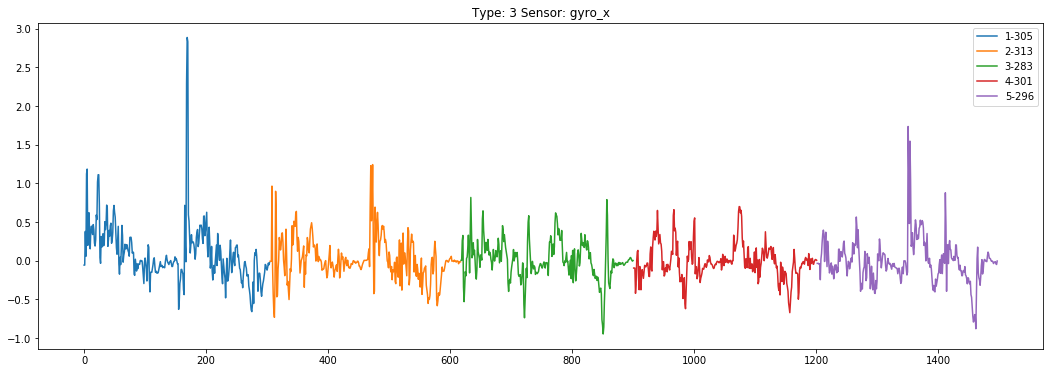

User_1


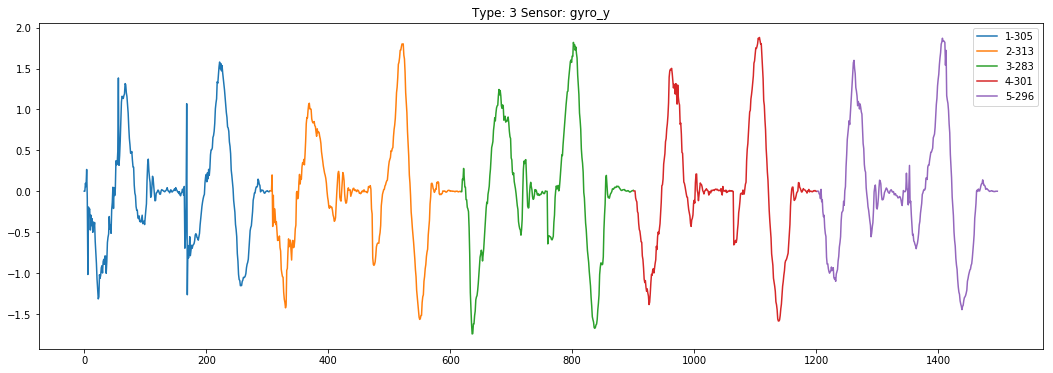

User_1


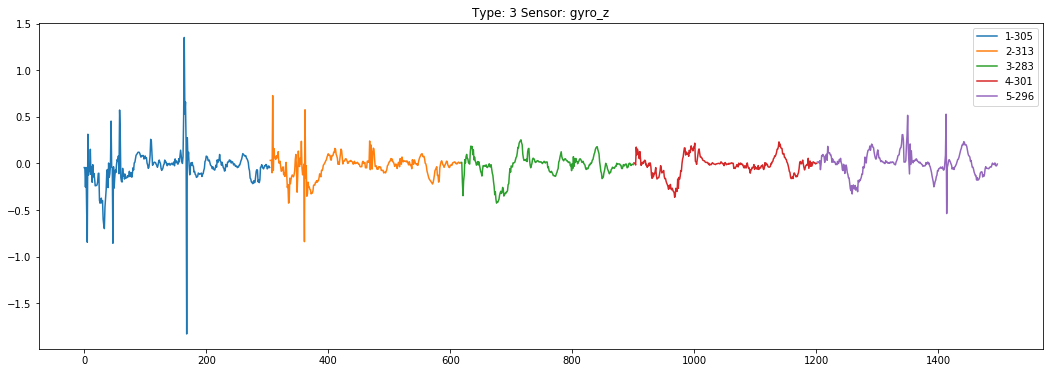

User_1


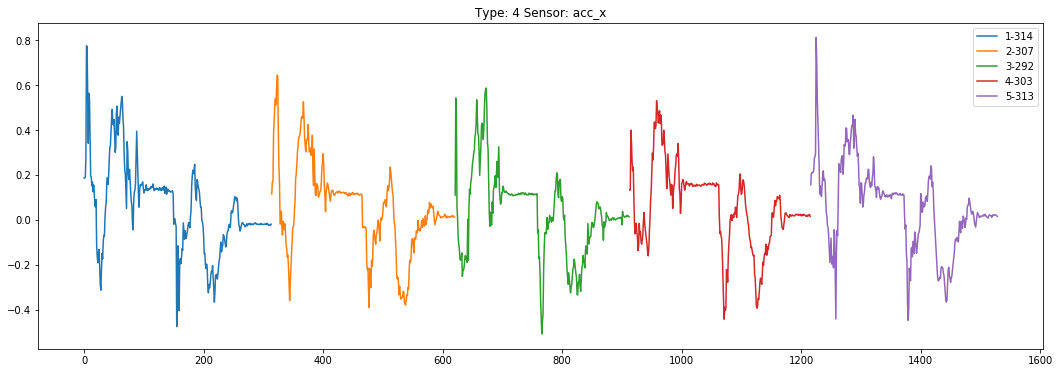

User_1


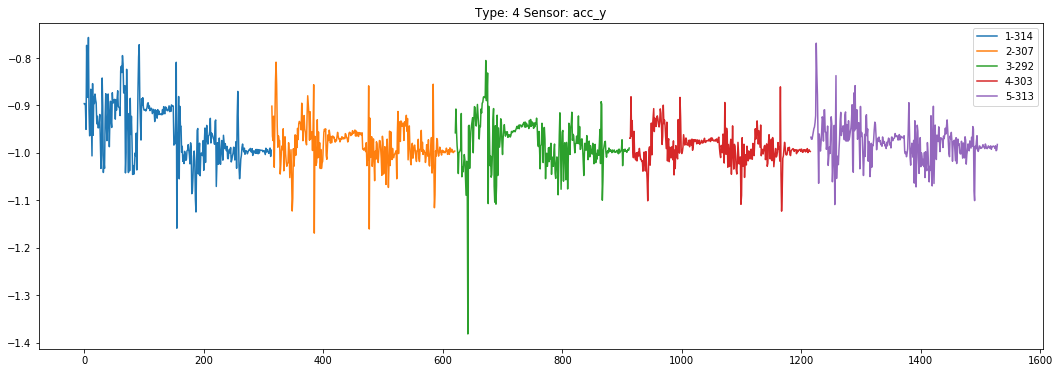

User_1


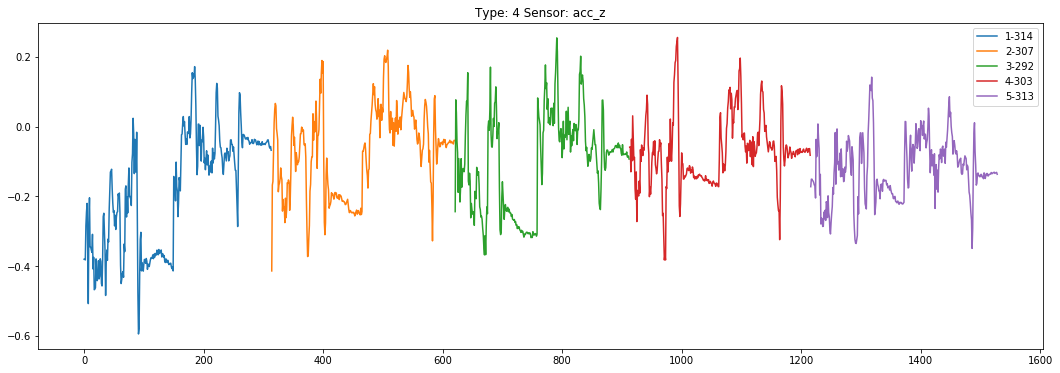

User_1


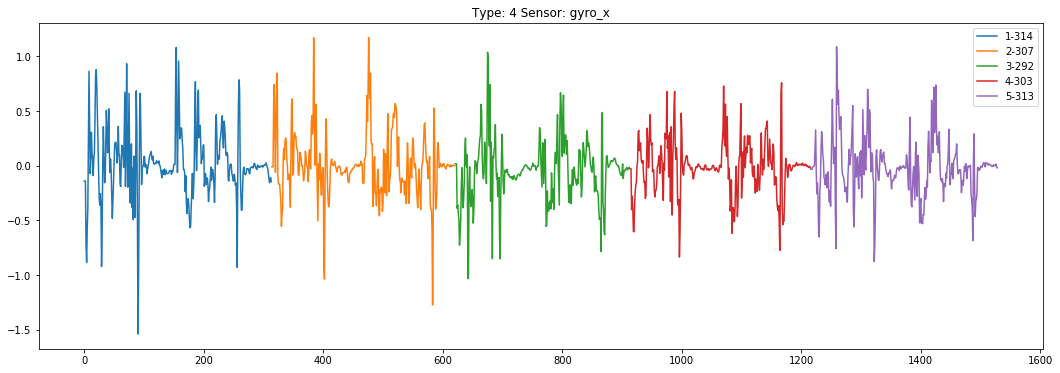

User_1


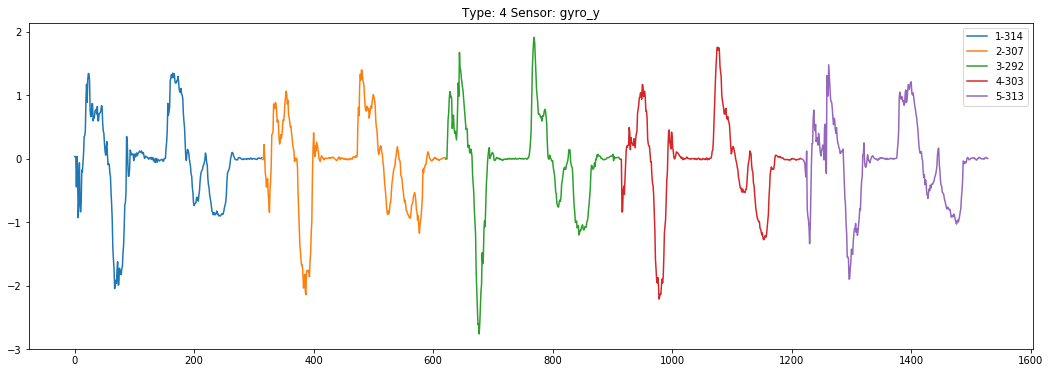

User_1


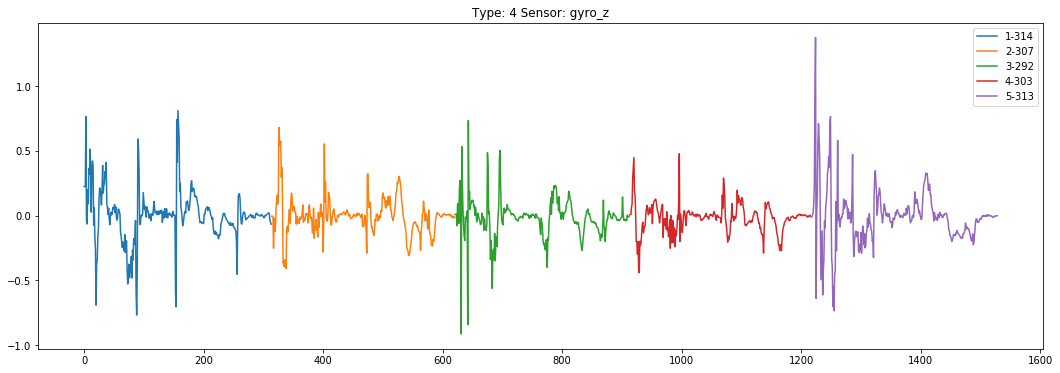

User_2


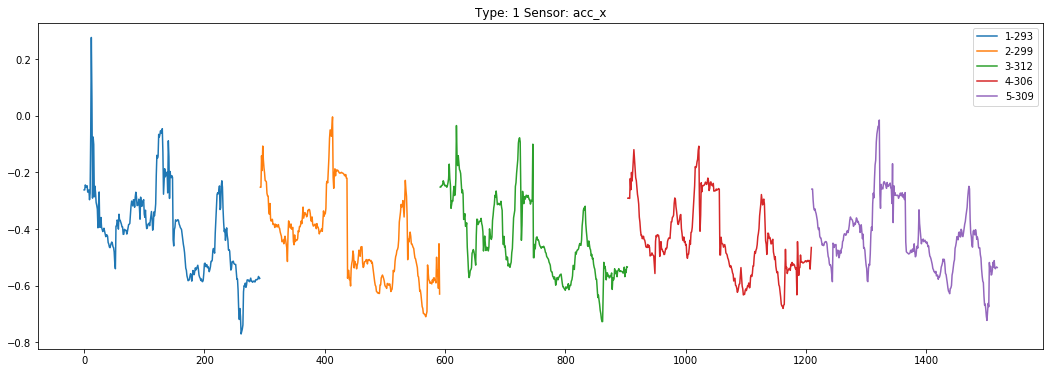

User_2


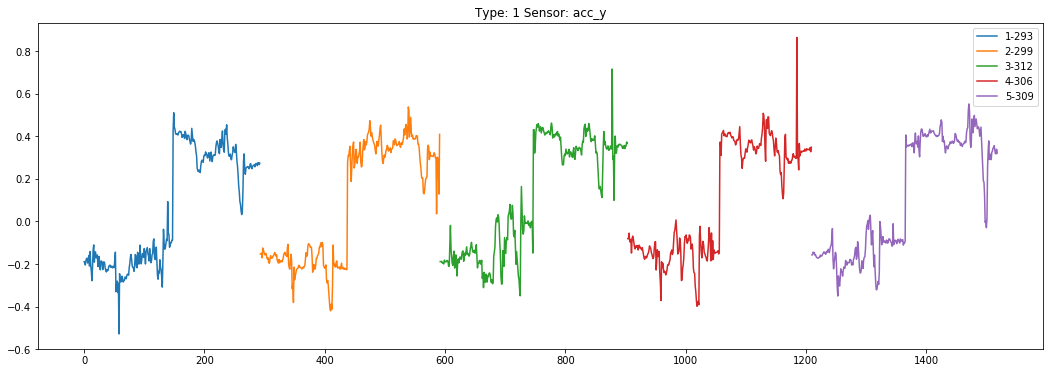

User_2


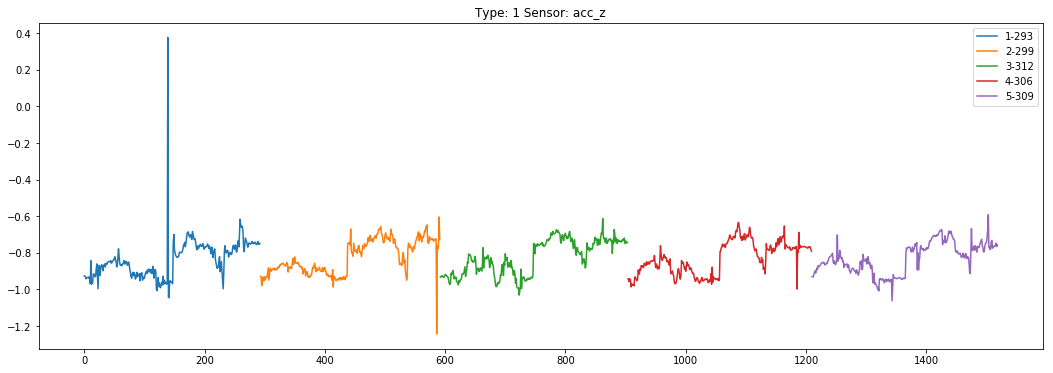

User_2


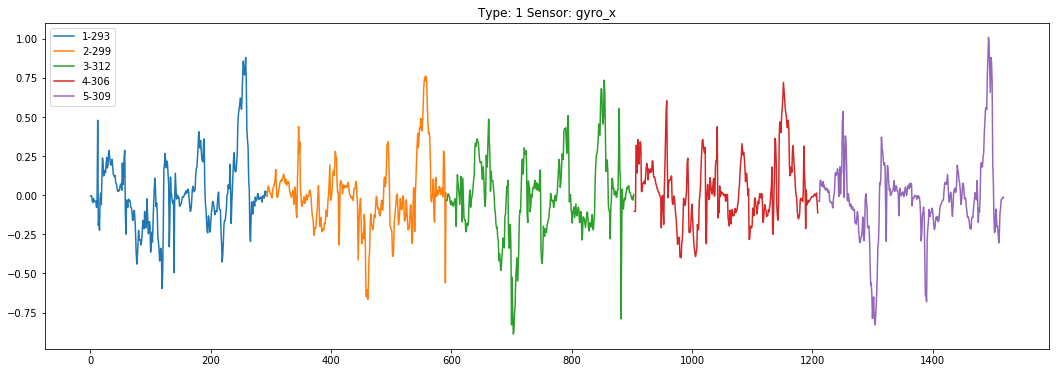

User_2


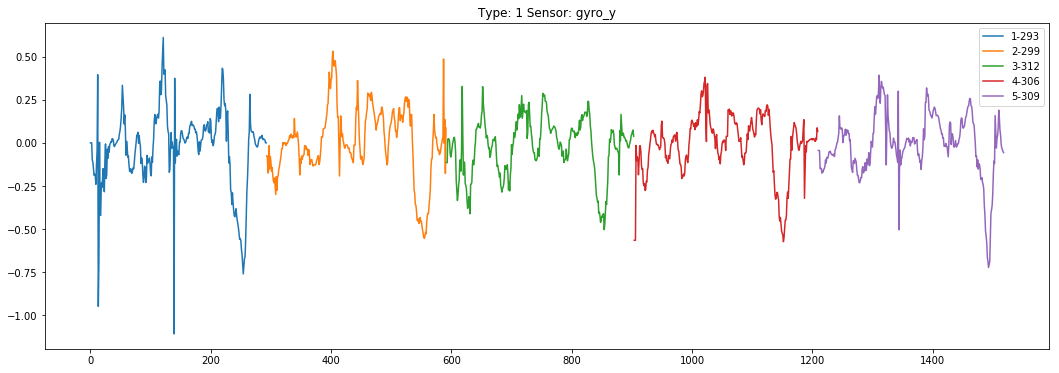

User_2


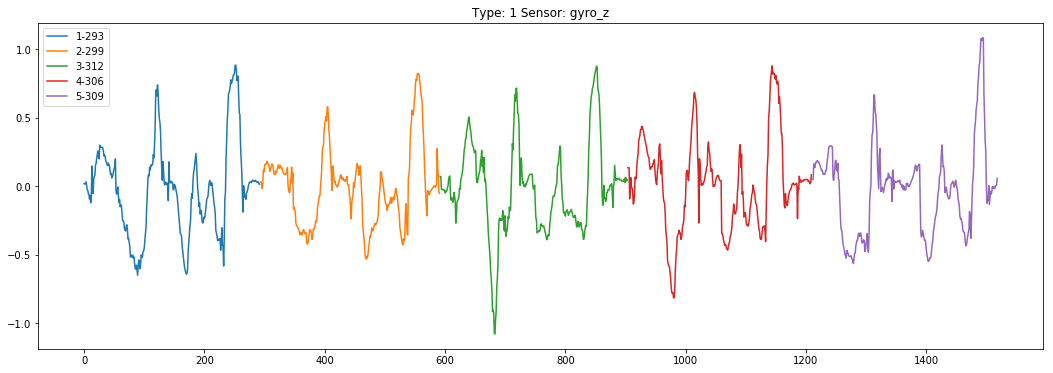

User_2


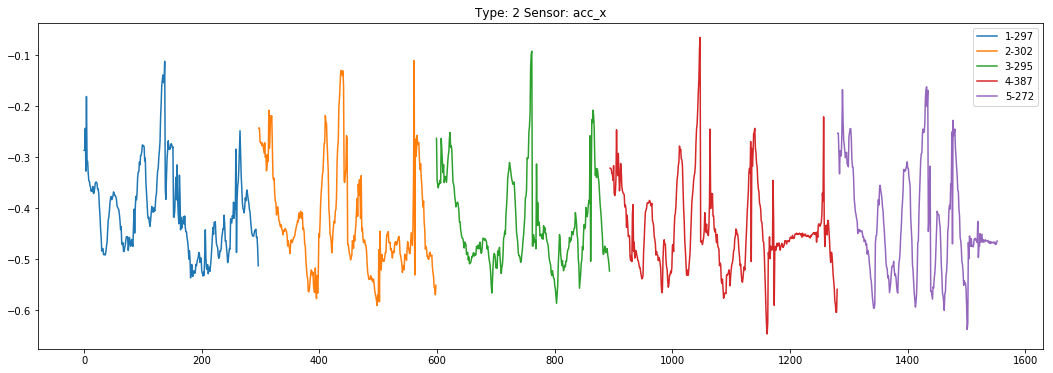

User_2


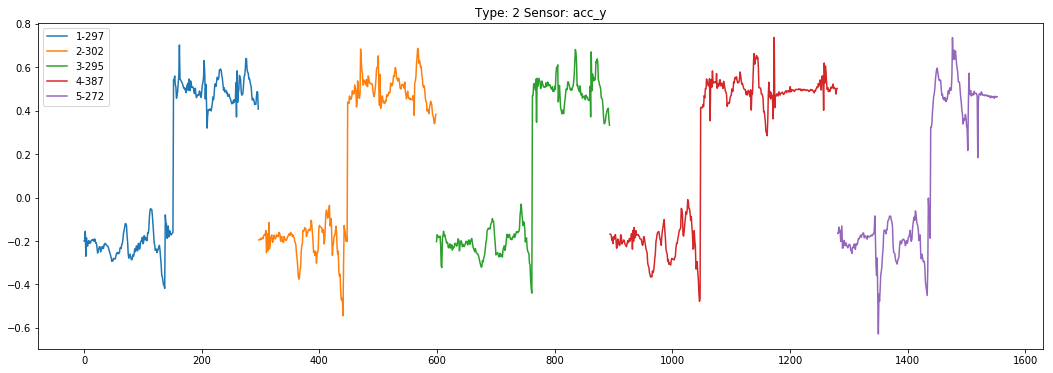

User_2


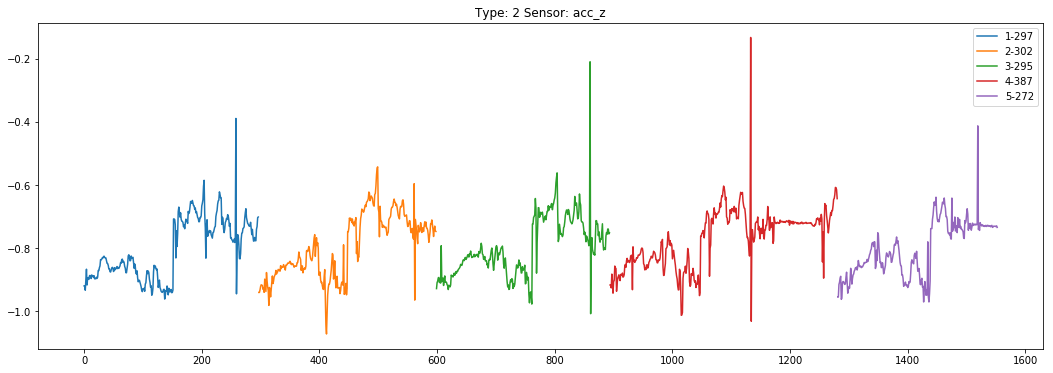

User_2


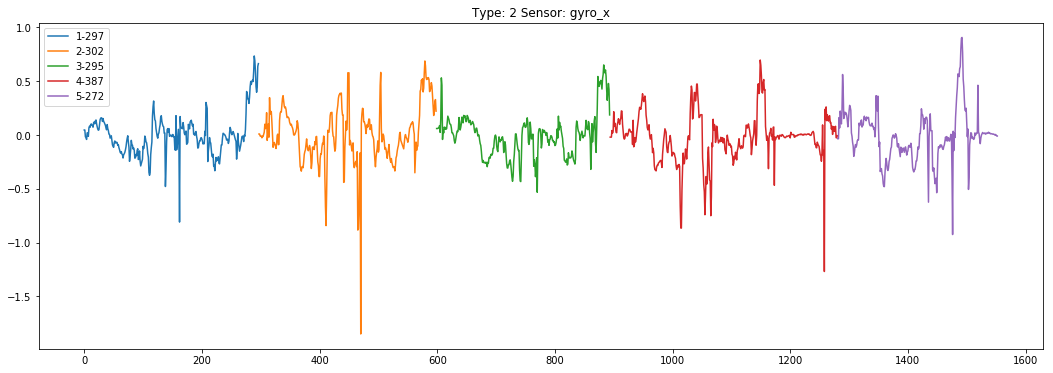

User_2


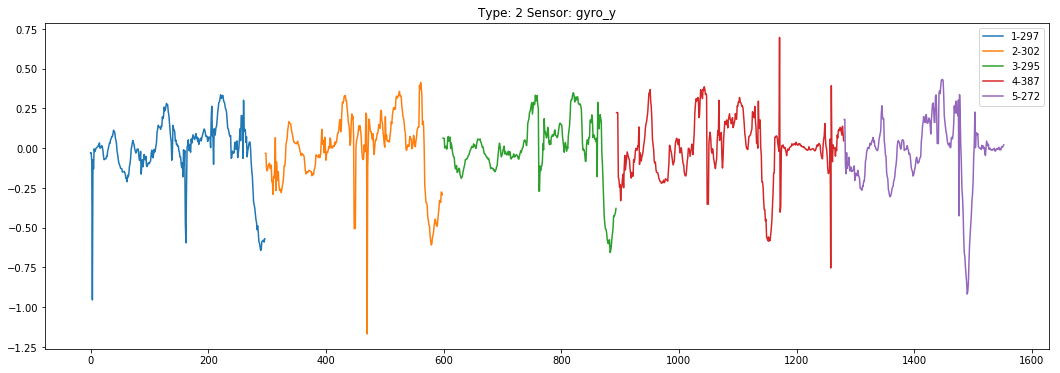

User_2


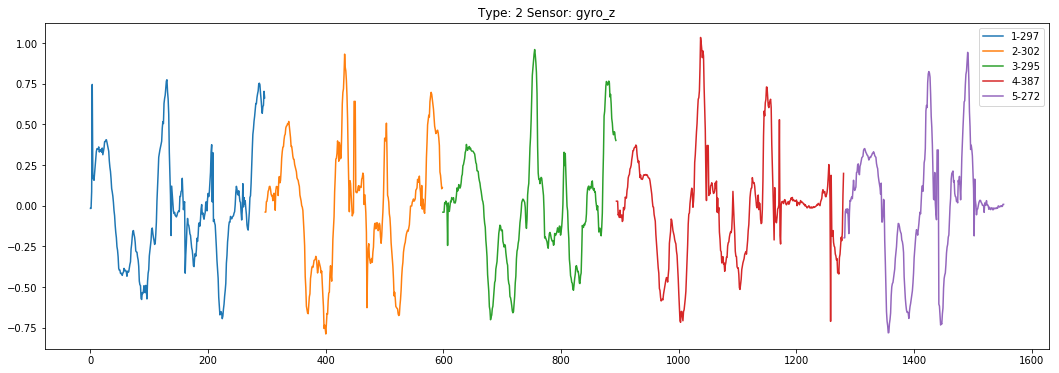

User_2


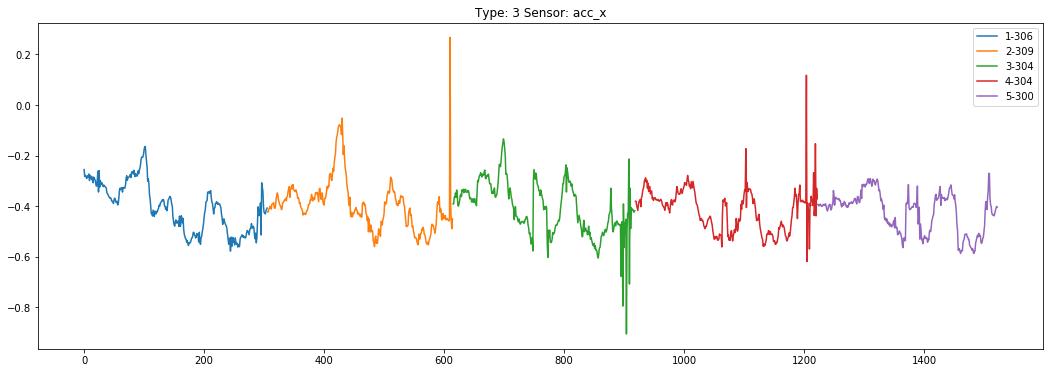

User_2


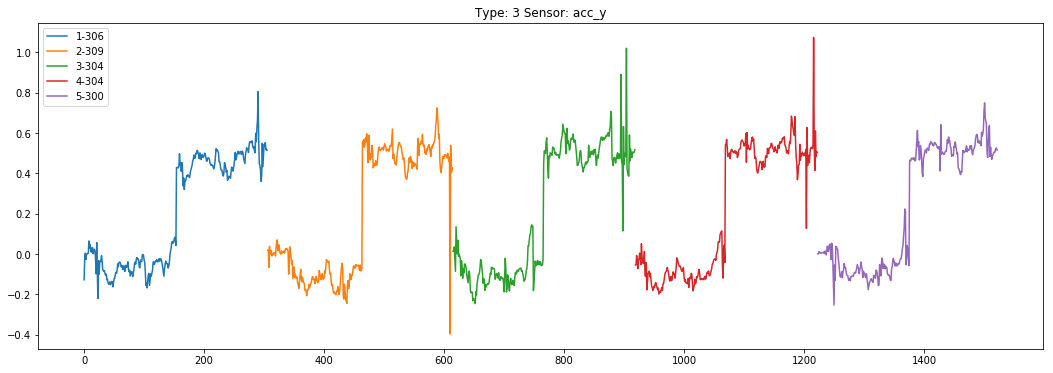

User_2


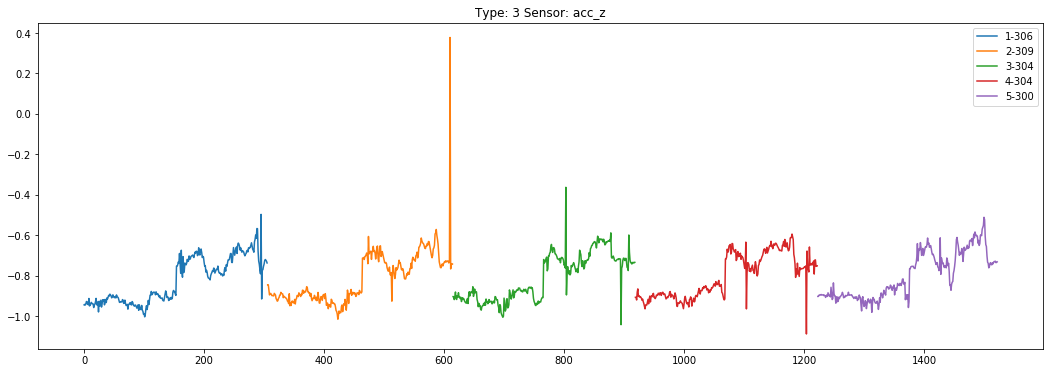

User_2


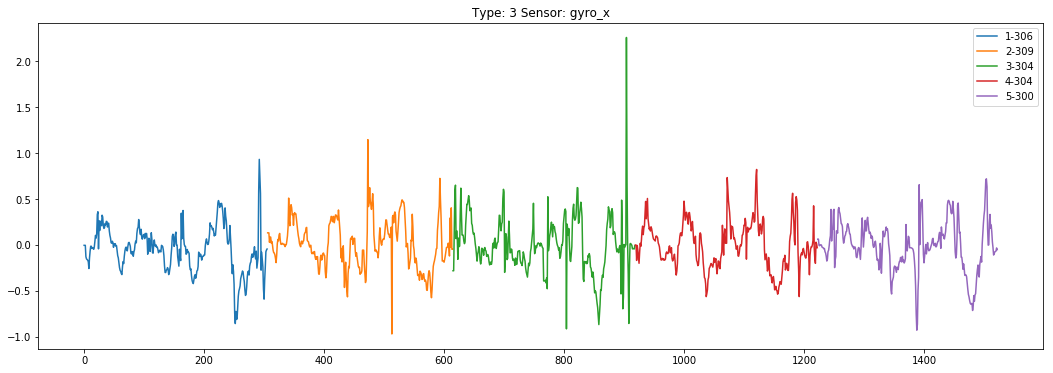

User_2


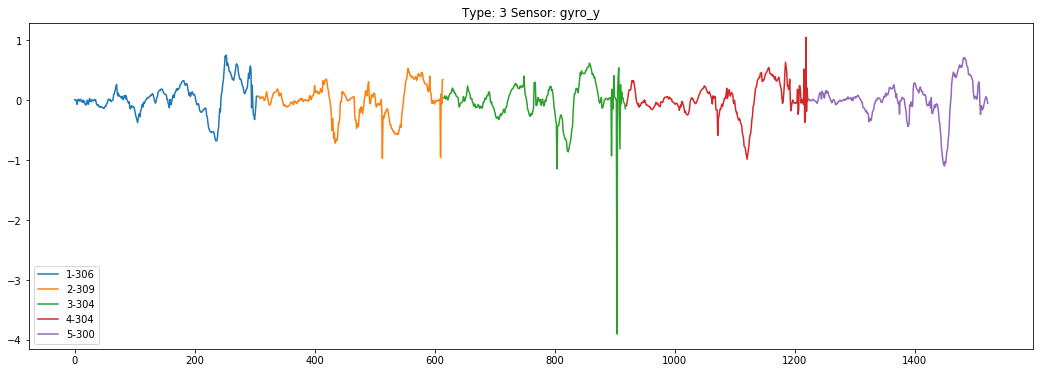

User_2


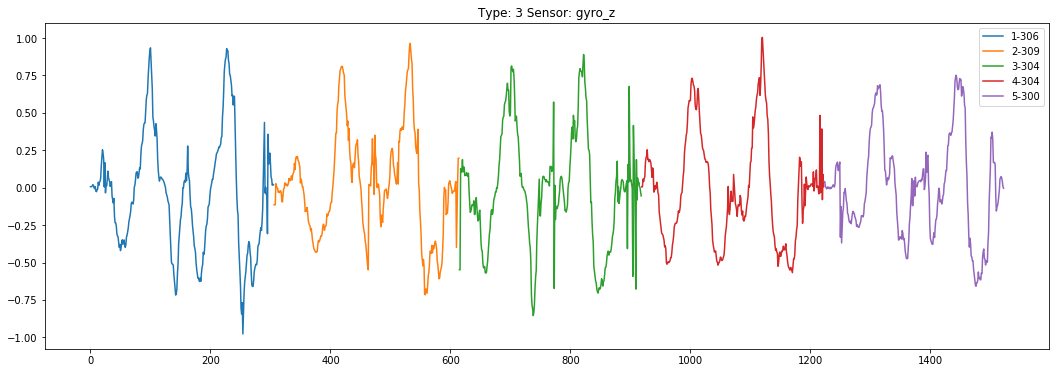

User_2


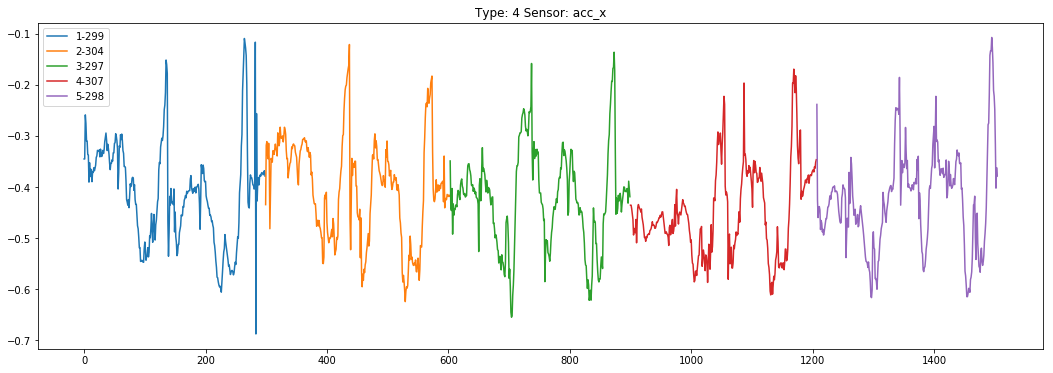

User_2


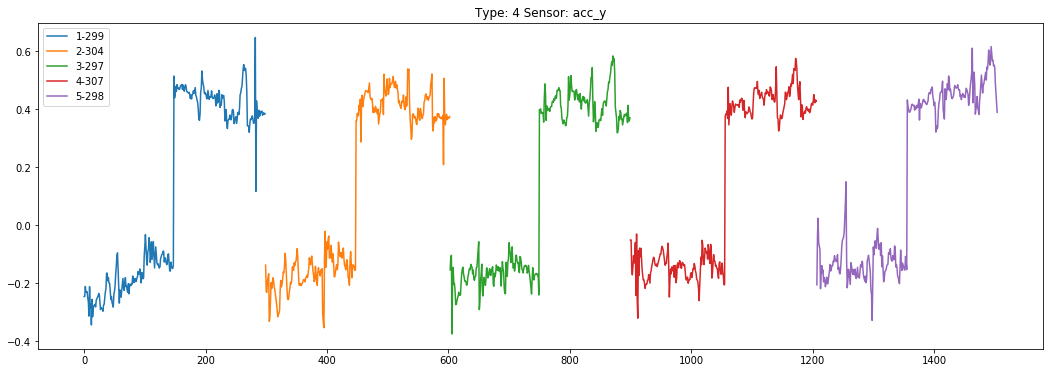

User_2


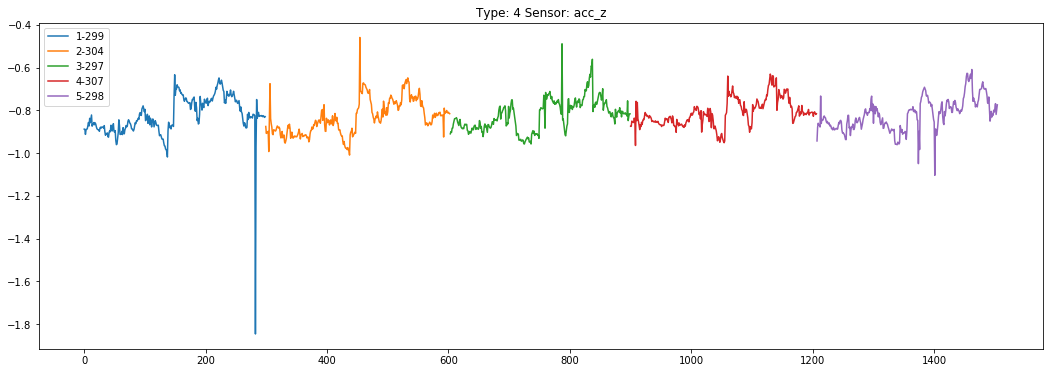

User_2


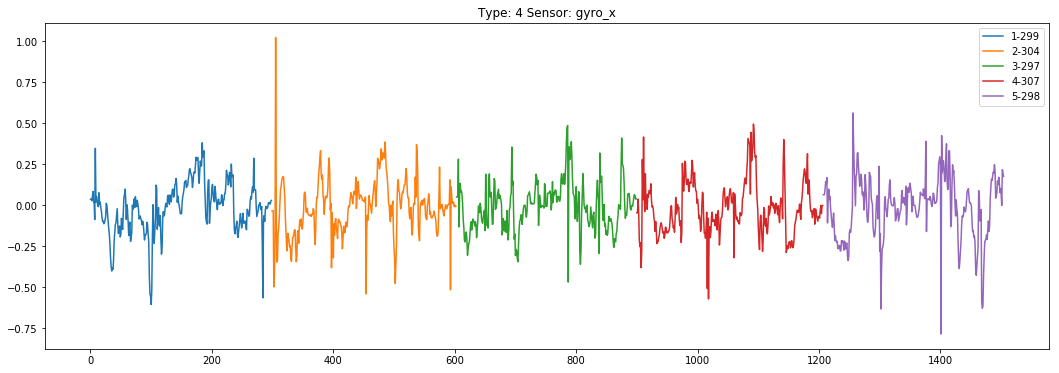

User_2


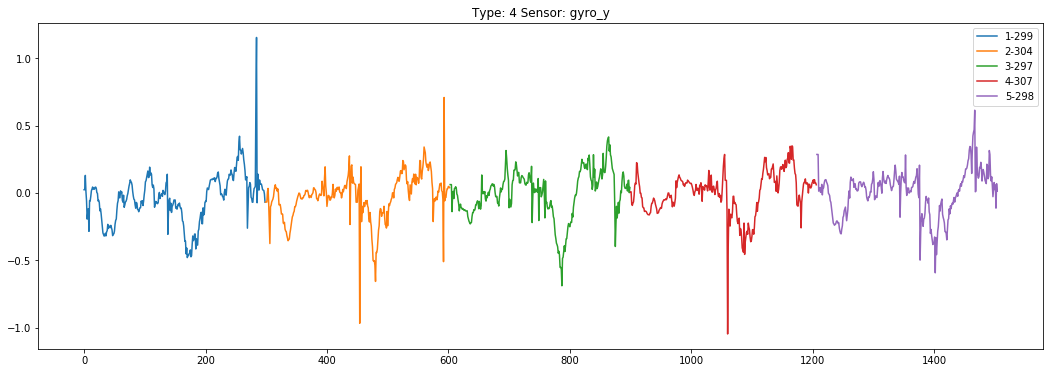

User_2


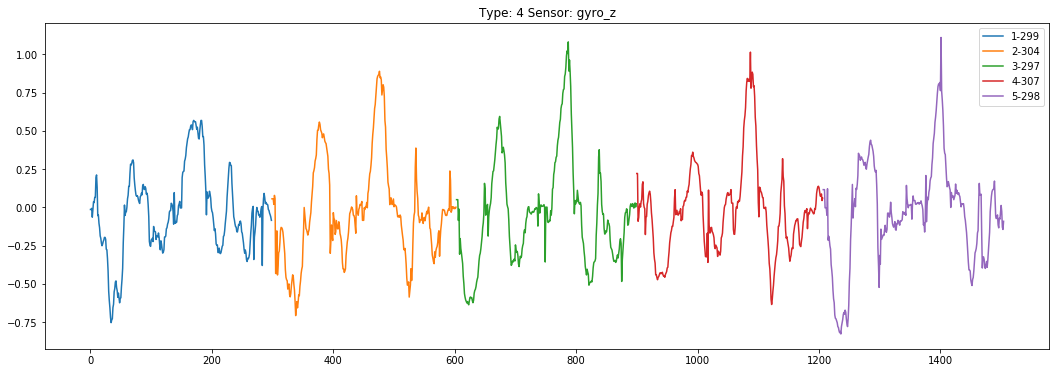

In [4]:
names = df['username'].unique()
seq_lengths = list()
for name in names:
    n = df.loc[df['username'] == name]    
    types = np.array([1,2,3,4])
    for type_ in types:
        t = n.loc[n['type'] == type_]
        sensors = t.columns[2:8]
        for sensor in sensors:
            s = t
            plt.figure(figsize=(18,6))
            s_index = 0
            for trial in s['ntrial'].unique():
                nt = s.loc[s['ntrial'] == trial]
                nt = nt.sort_values('timestamp')
                label_ = str(trial)+"-"+str(nt[sensor].shape[0])
                plt.plot(pd.Series(nt[sensor].values,index=range(s_index,s_index+nt[sensor].shape[0])),label=label_)
                seq_lengths.append(nt[sensor].shape[0])
                s_index += nt[sensor].shape[0]
            print(name)
            plt.title("Type: %d Sensor: %s"%(type_,sensor))
            plt.legend()
            plt.show()

In [5]:
pd.DataFrame(seq_lengths).describe()

0
count  240.000000
mean   303.150000
std     16.225735
min    272.000000
25%    295.750000
50%    301.500000
75%    307.500000
max    387.000000

In [6]:
cols = ['sensor_type','trial','name','type','set']
SEQ_LENGTH = 303
OVERLAP = 0
for i in range(SEQ_LENGTH):
    cols.append('x'+str(i))
moving_window_x = pd.DataFrame(columns = cols)

label = pd.DataFrame(columns = ['sensor_type','set','type1','type2','type3','type4'])
s_index = 0
for trial in np.sort(df['ntrial'].unique()):
    nt = df.loc[df['ntrial'] == trial]

    names = df['username'].unique()
    for name in names:
        n = nt.loc[nt['username'] == name]
        
        types = np.array([1,2,3,4])
        for type_ in types:
            t = n.loc[n['type'] == type_]
            
            sensors = t.columns[2:8]
            for sensor in sensors:  
                s = t
                
                if trial == 5: text="test"
                else: text="train"
                    
                row = np.array([sensor])
                row = np.append(row,[trial])
                row = np.append(row,[name])
                row = np.append(row,[type_])
                row = np.append(row,[text])
                """Padding"""
                if s[sensor].values.shape[0] > SEQ_LENGTH:
                    row = np.append(row,s[sensor].values[:SEQ_LENGTH].astype(float))
                    #print(s[sensor].values[:SEQ_LENGTH])
                elif s[sensor].values.shape[0] <= SEQ_LENGTH:
                    padded_row = np.append(s[sensor].values[:].astype(float),np.array([s[sensor].values[-1].astype(float) for i in range(SEQ_LENGTH-s[sensor].values.shape[0])]))
                    row = np.append(row,padded_row)
                moving_window_x = moving_window_x.append(pd.DataFrame([row],columns=moving_window_x.columns))
                
                row_label = np.array([sensor])
                row_label = np.append(row_label,[text])
                row_label = np.append(row_label,np.zeros((types.shape[0],)))
                row_label[type_+1] = 1.0
                label = label.append(pd.DataFrame([row_label],columns=label.columns))
                
    s_index += s[sensor].shape[0]

In [7]:
mdf = moving_window_x
mdf.head()

sensor_type trial    name type    set           x0           x1  \
0       acc_x     1  User_1    1  train     0.197403     0.197403   
0       acc_y     1  User_1    1  train   -0.9118347   -0.9118347   
0       acc_z     1  User_1    1  train    -0.321167    -0.321167   
0      gyro_x     1  User_1    1  train   0.04131851   0.04131851   
0      gyro_y     1  User_1    1  train  -0.01665488  -0.01665488   

                    x2                    x3                    x4  \
0           0.08113098            0.09988403             0.0811615   
0  -0.9439086999999999             -0.970932            -0.9682465   
0            -0.262146             -0.226944  -0.23547359999999998   
0           0.01131534             0.1071343            0.07671592   
0           0.01434938  0.006068456999999999          -0.004963335   

          ...                            x293                 x294  \
0         ...                     -0.01829529          0.002685547   
0         ...                      -0.7836456            -0.764328   
0         ...                      -0.6551056           -0.6021271   
0         ...            -0.25480610000000004  0.17817460000000002   
0         ...           0.0017532479999999998           0.01696966   

                  x295                 x296                 x297  \
0          0.002685547          0.002685547          0.002685547   
0            -0.764328            -0.764328            -0.764328   
0           -0.6021271           -0.6021271           -0.6021271   
0  0.17817460000000002  0.17817460000000002  0.17817460000000002   
0           0.01696966           0.01696966           0.01696966   

                  x298                 x299                 x300  \
0          0.002685547          0.002685547          0.002685547   
0            -0.764328            -0.764328            -0.764328   
0           -0.6021271           -0.6021271           -0.6021271   
0  0.17817460000000002  0.17817460000000002  0.17817460000000002   
0           0.01696966           0.01696966           0.01696966   

                  x301                 x302  
0          0.002685547          0.002685547  
0            -0.764328            -0.764328  
0           -0.6021271           -0.6021271  
0  0.17817460000000002  0.17817460000000002  
0           0.01696966           0.01696966  

[5 rows x 308 columns]

User_1


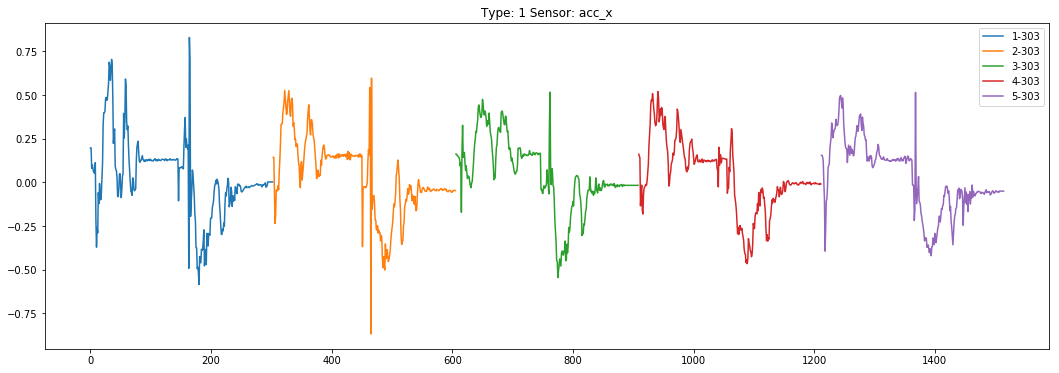

User_1


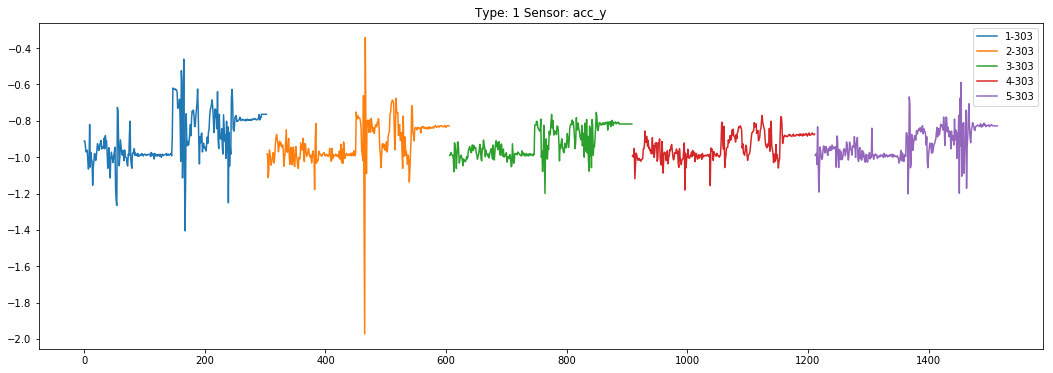

User_1


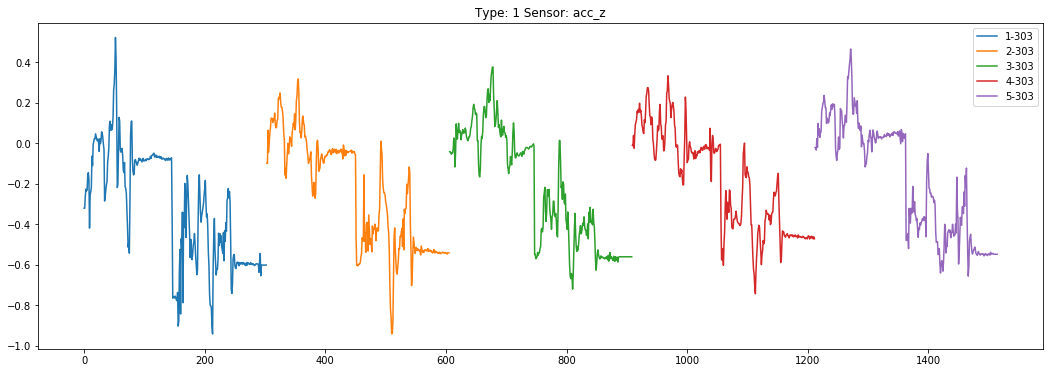

User_1


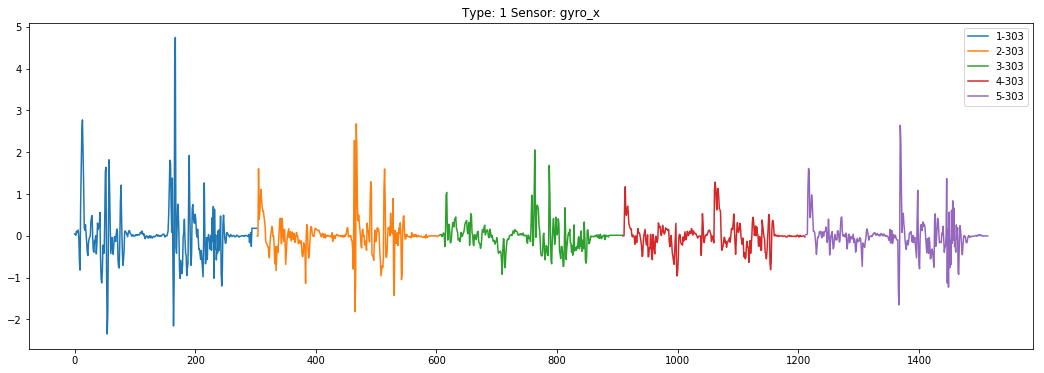

User_1


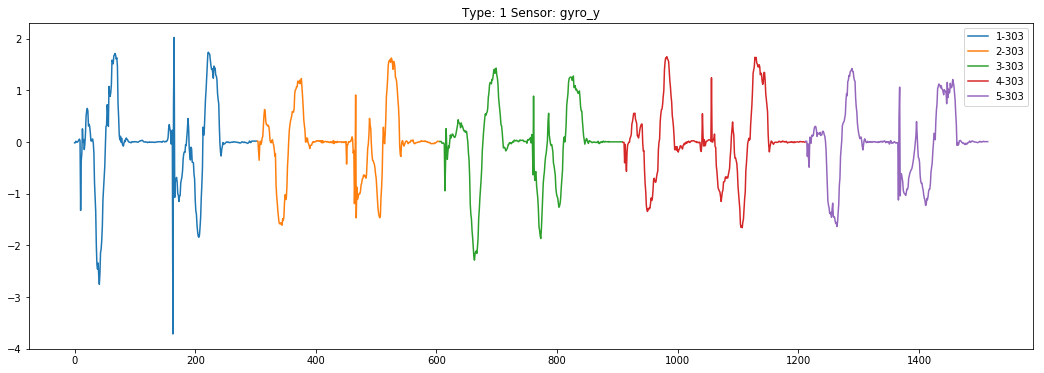

User_1


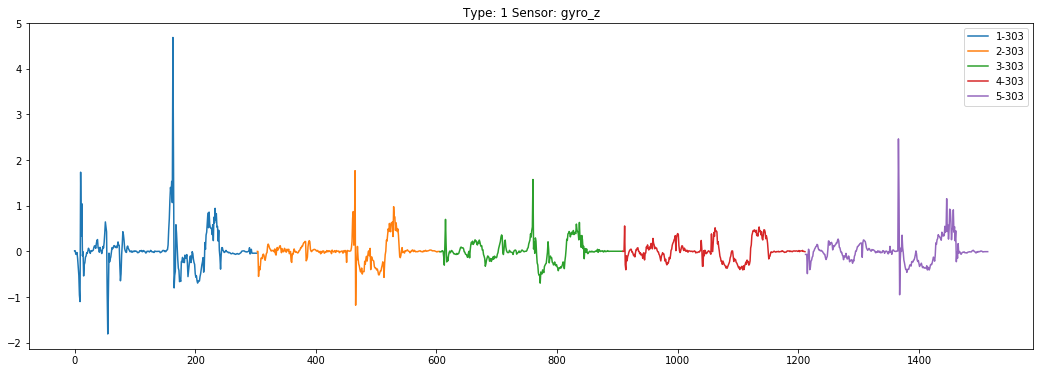

User_1


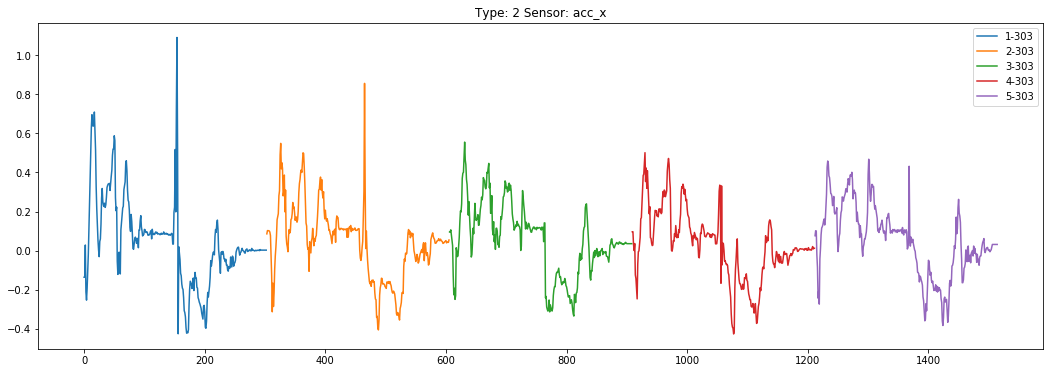

User_1


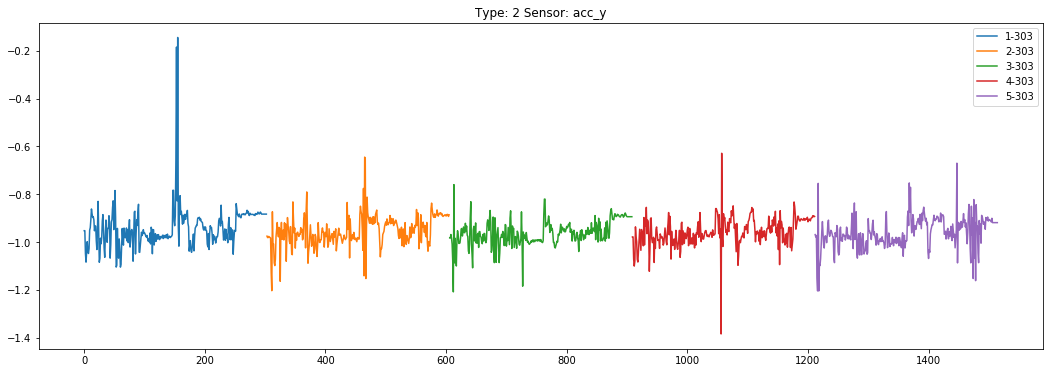

User_1


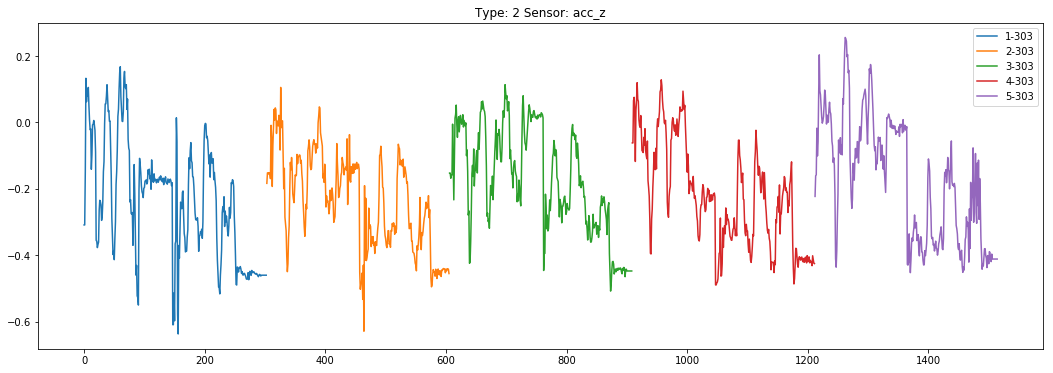

User_1


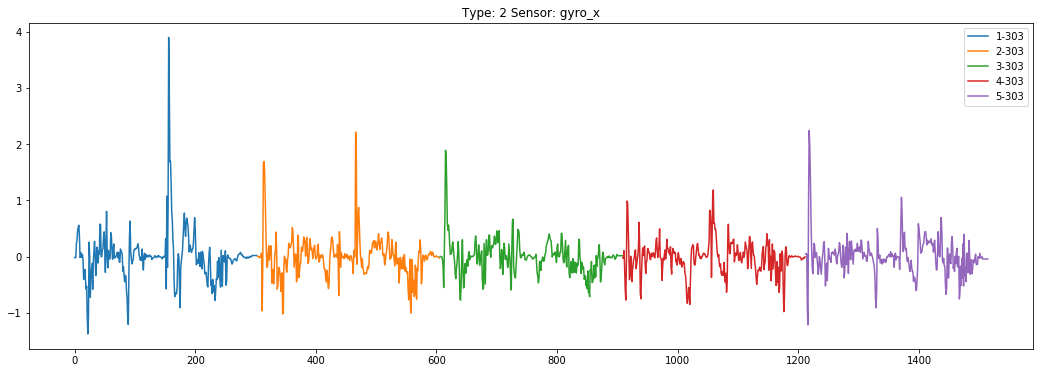

User_1


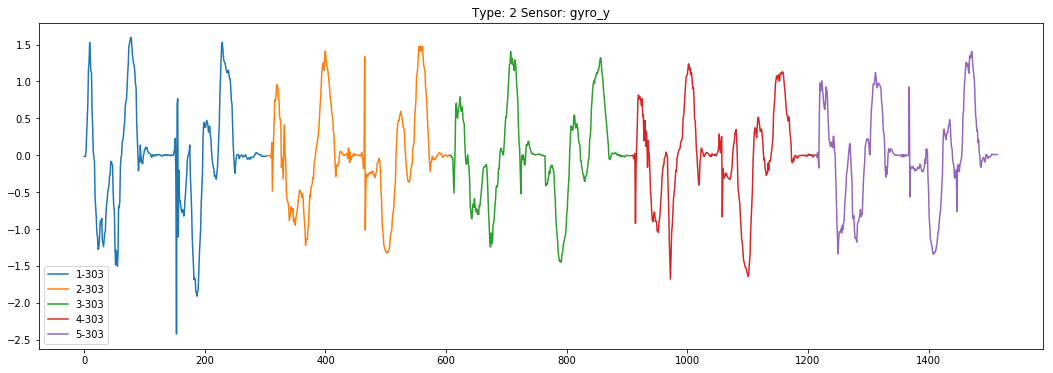

User_1


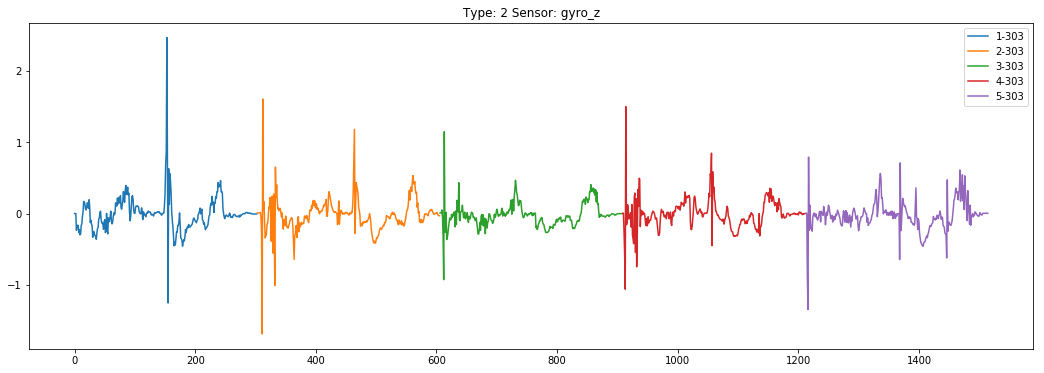

User_1


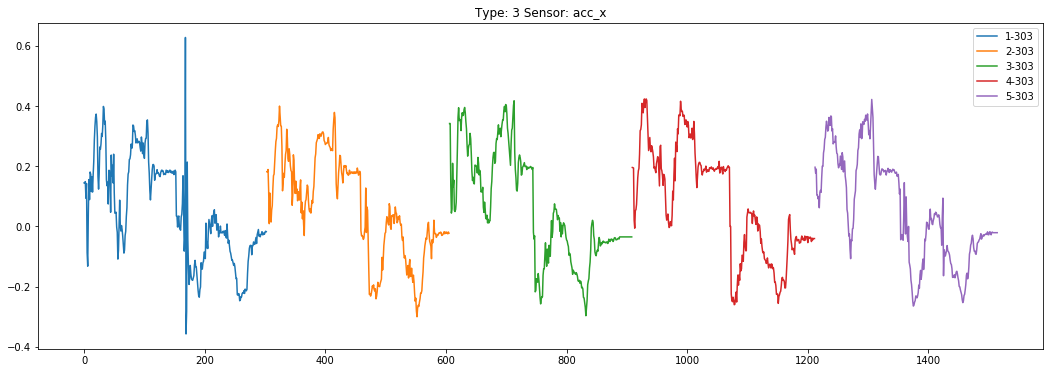

User_1


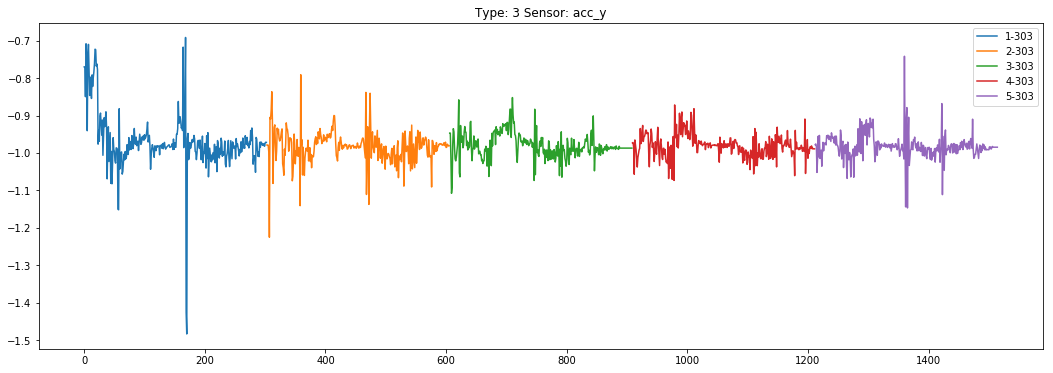

User_1


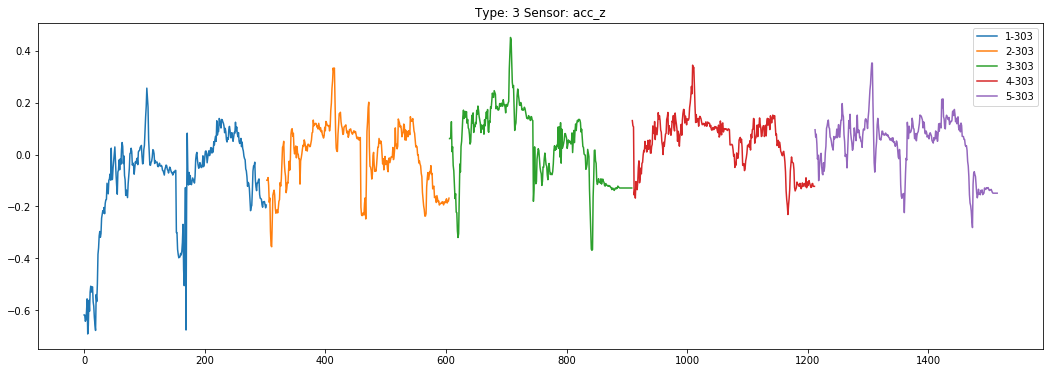

User_1


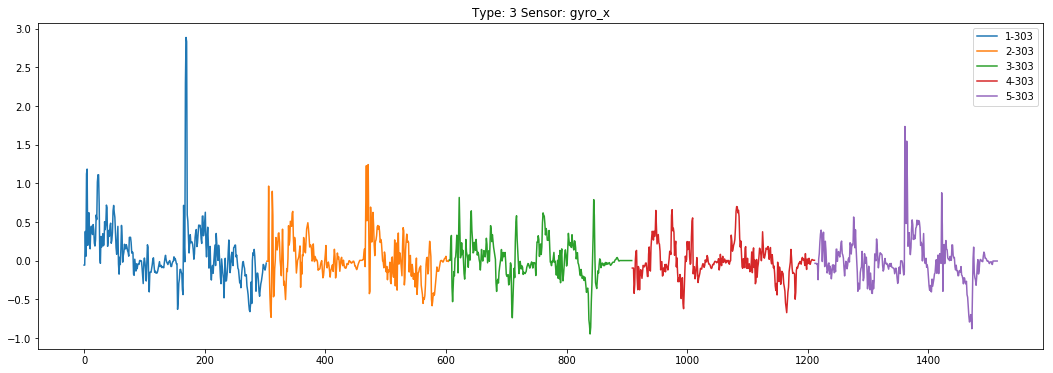

User_1


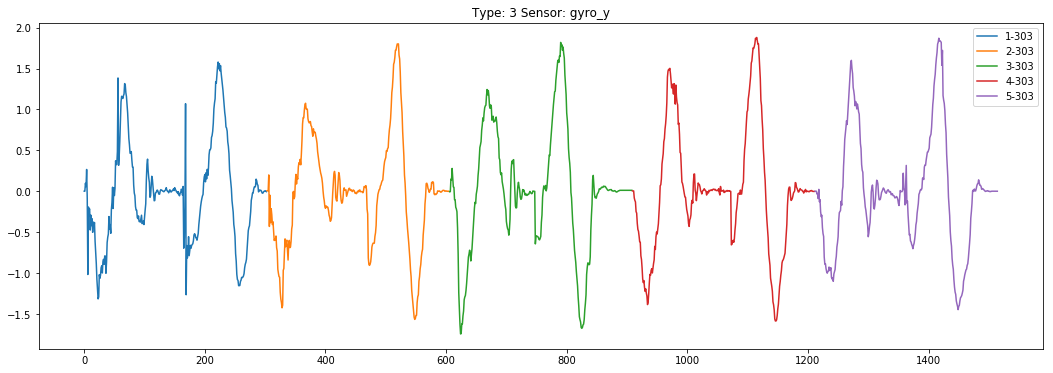

User_1


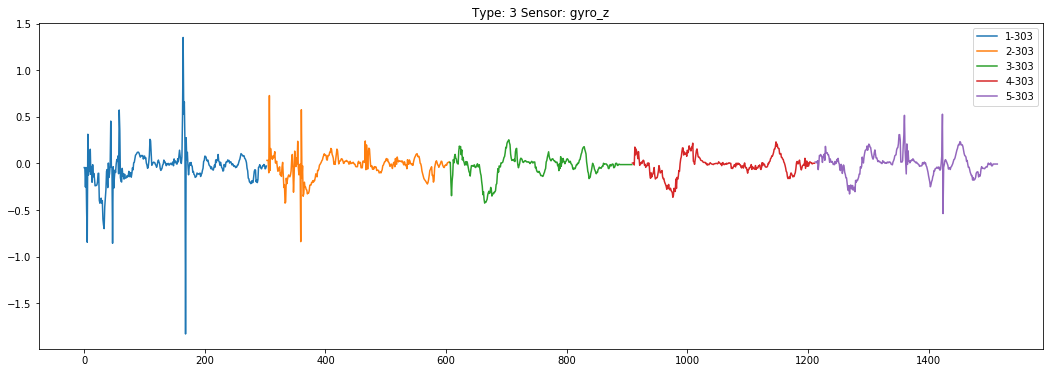

User_1


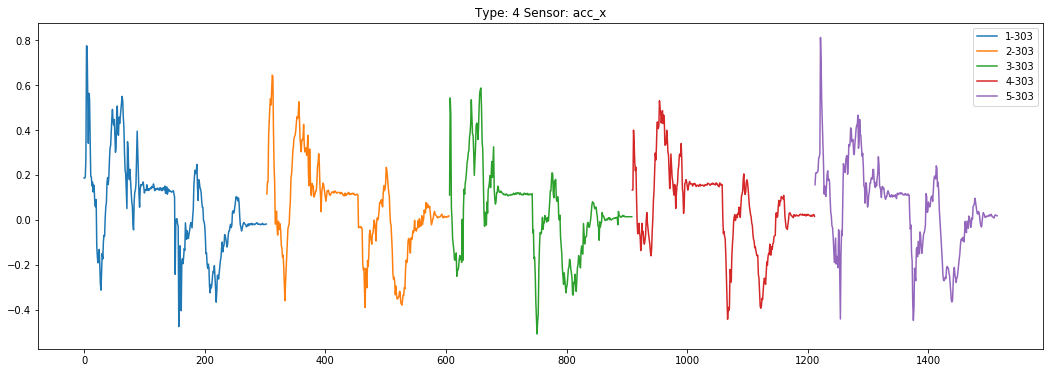

User_1


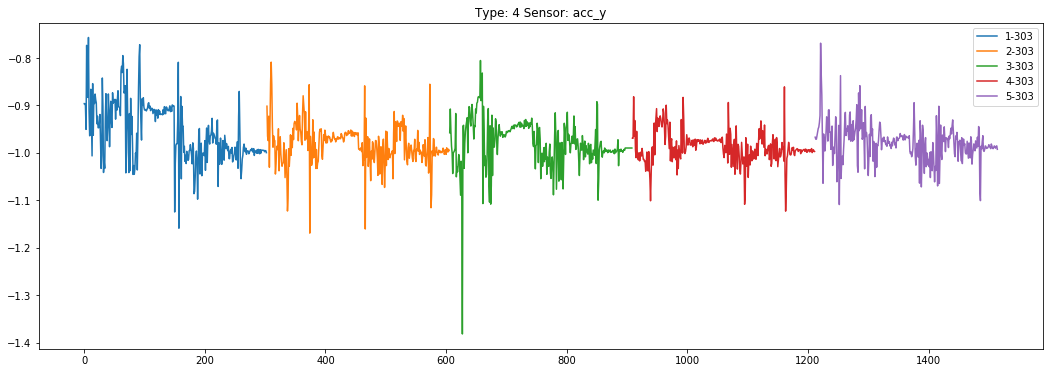

User_1


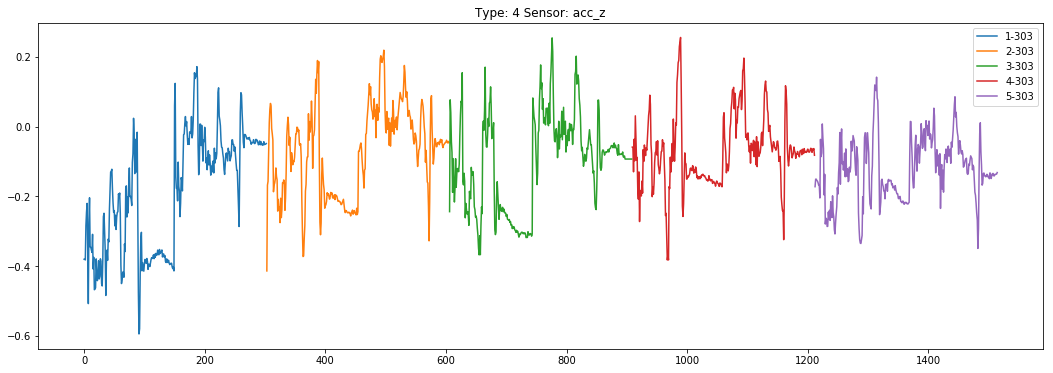

User_1


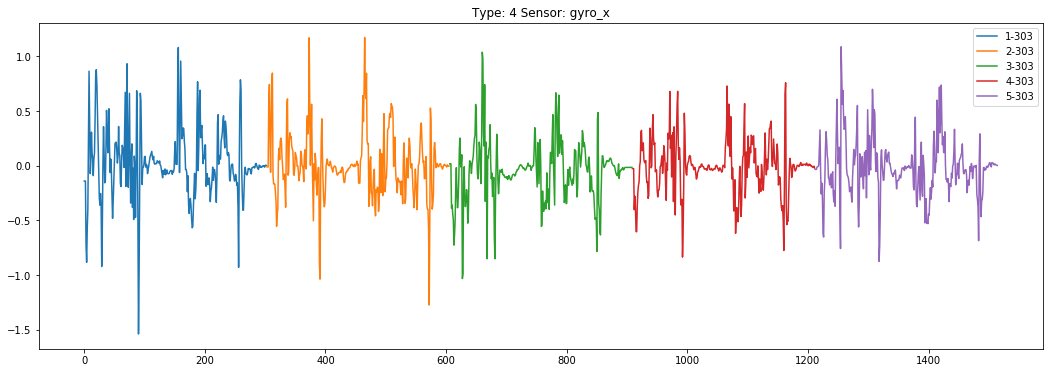

User_1


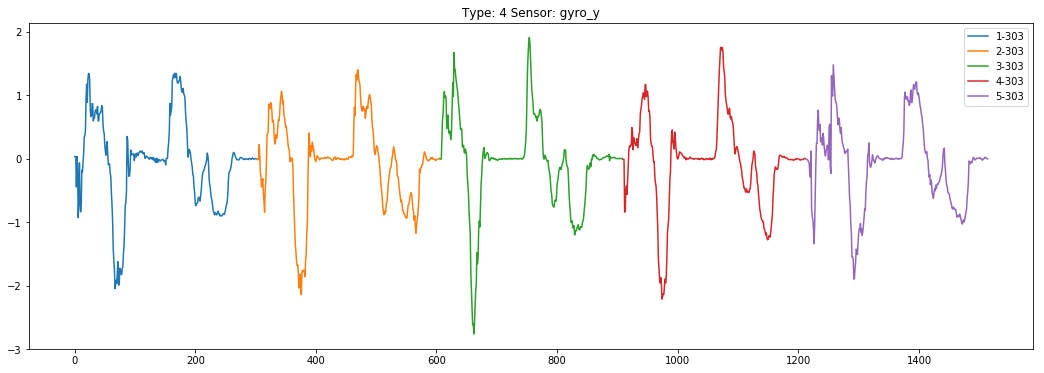

User_1


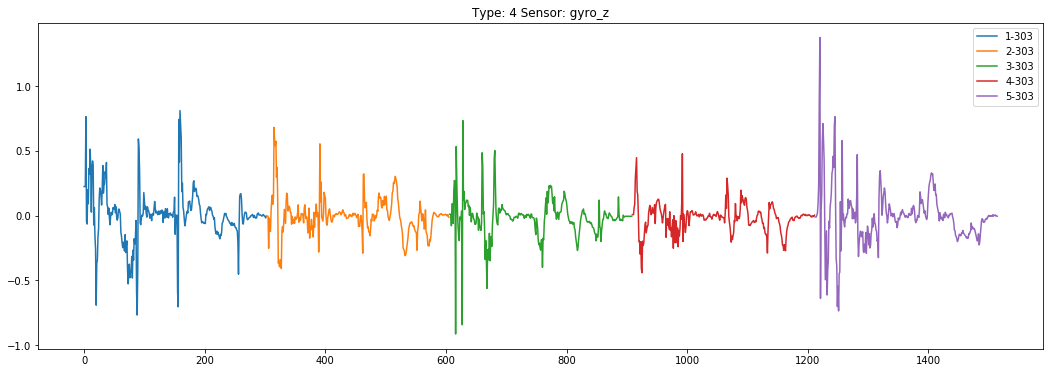

User_2


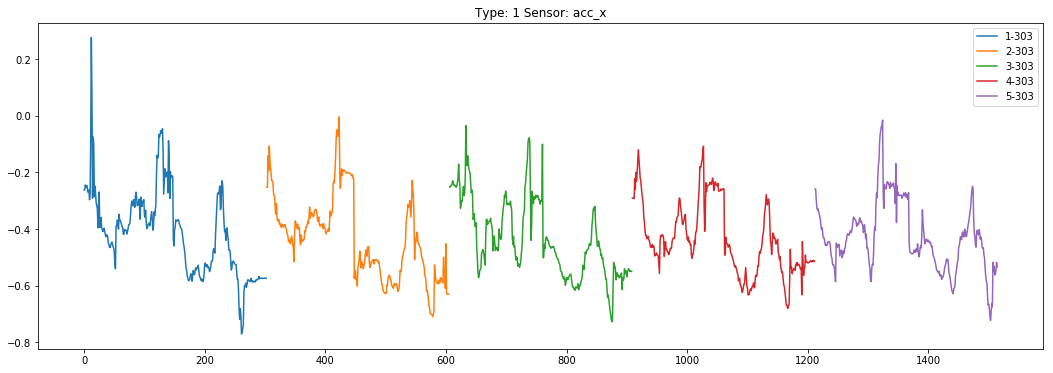

User_2


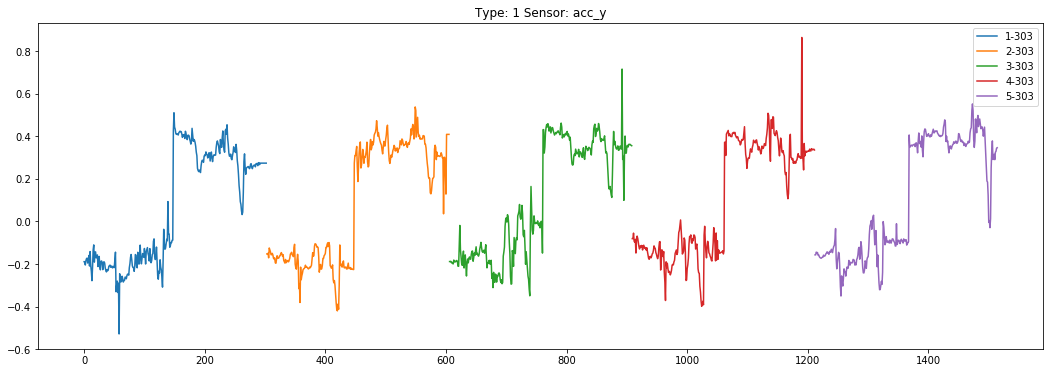

User_2


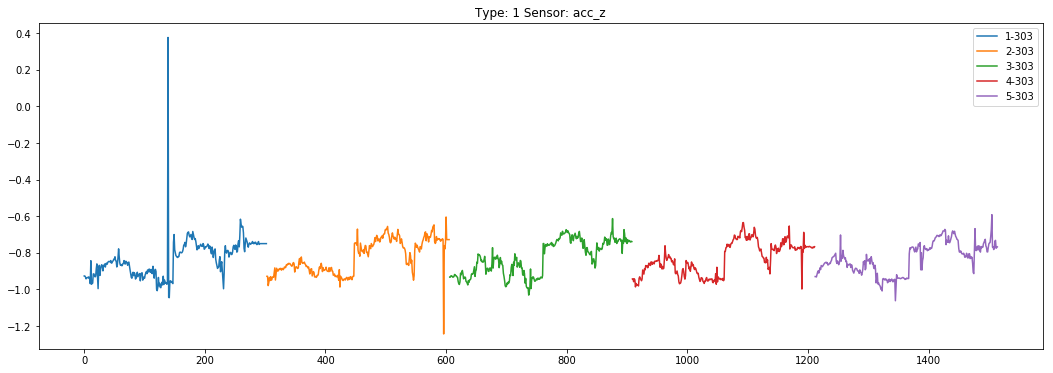

User_2


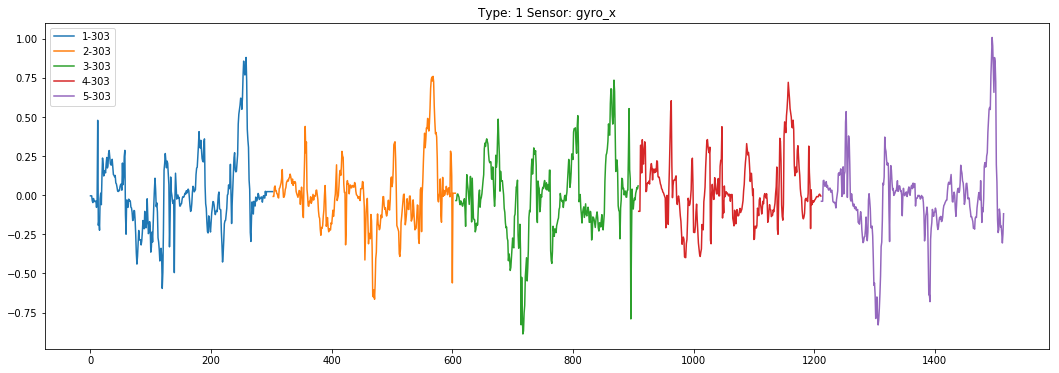

User_2


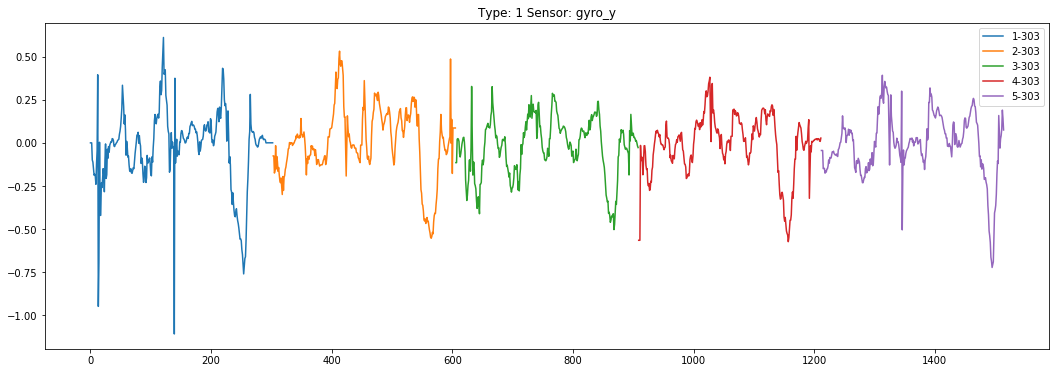

User_2


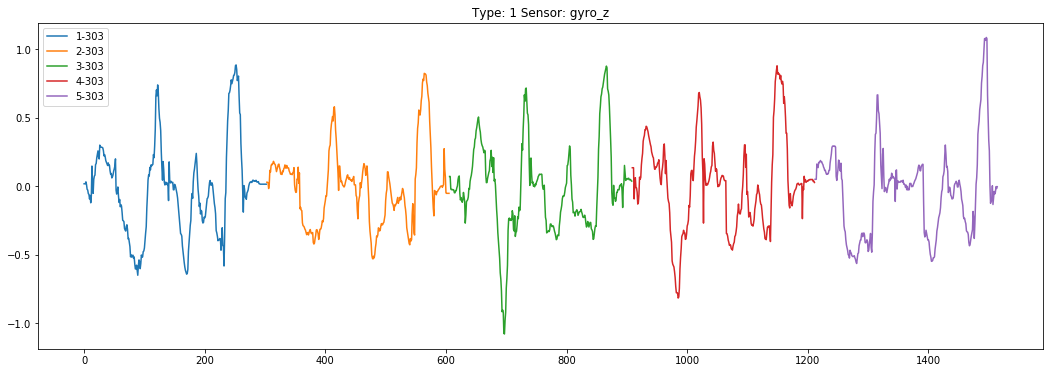

User_2


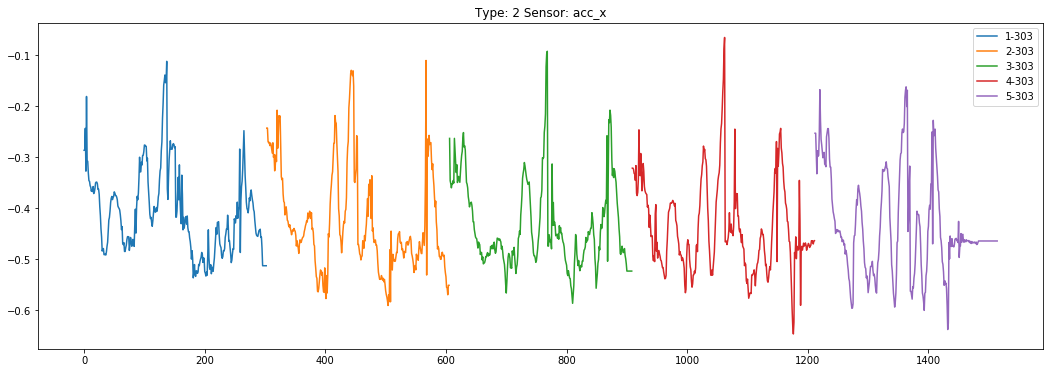

User_2


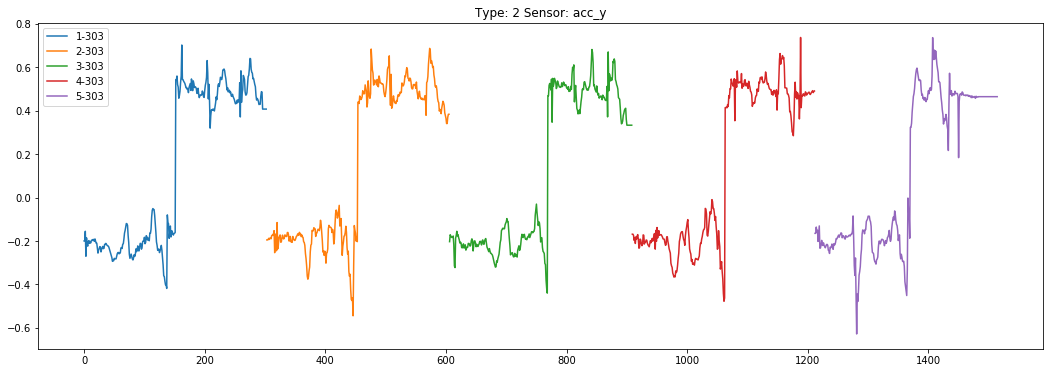

User_2


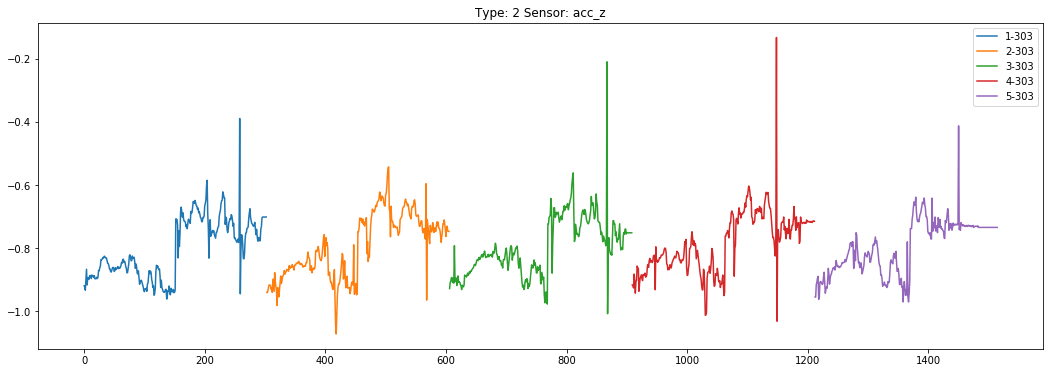

User_2


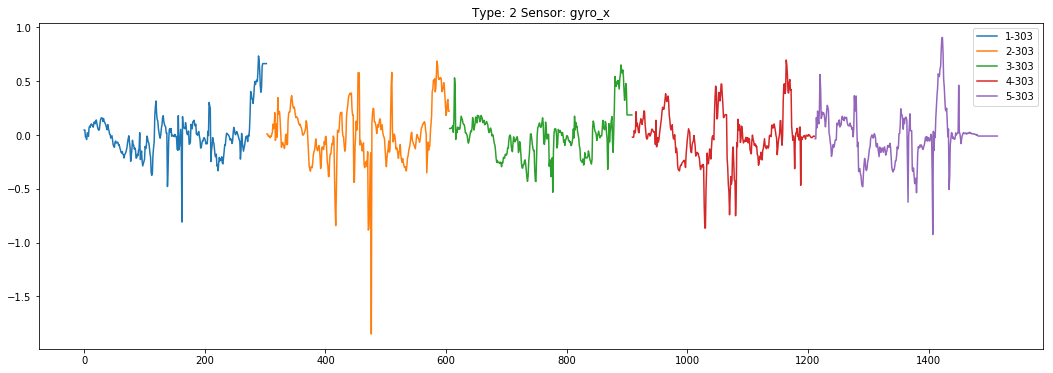

User_2


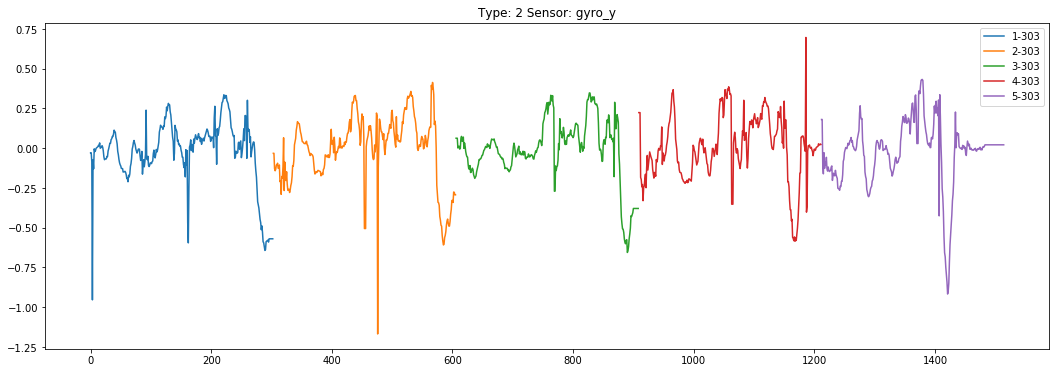

User_2


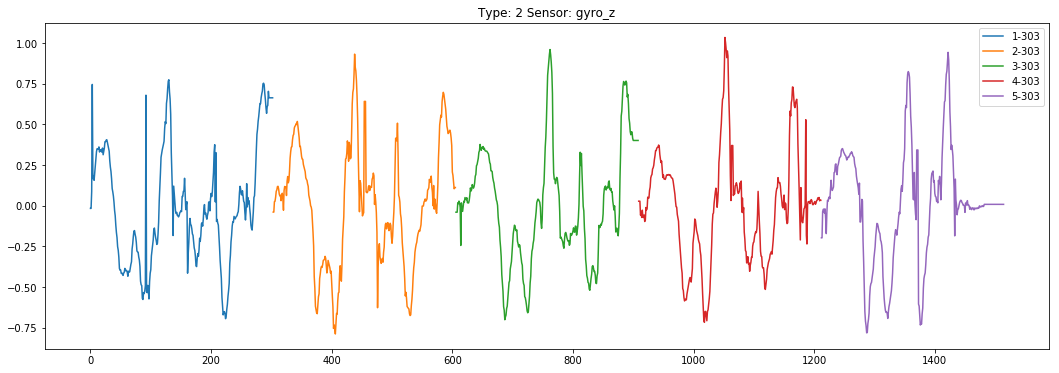

User_2


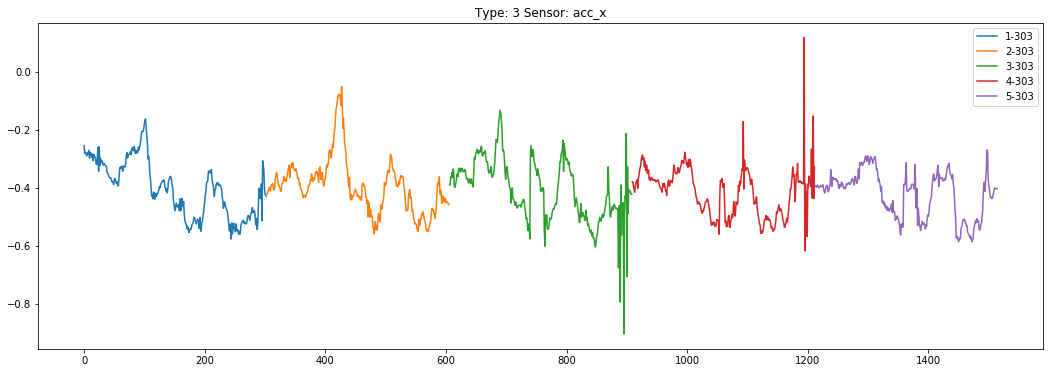

User_2


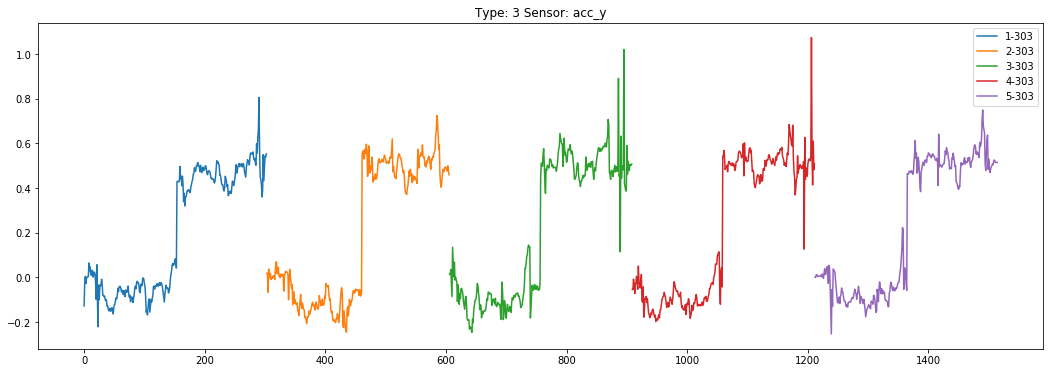

User_2


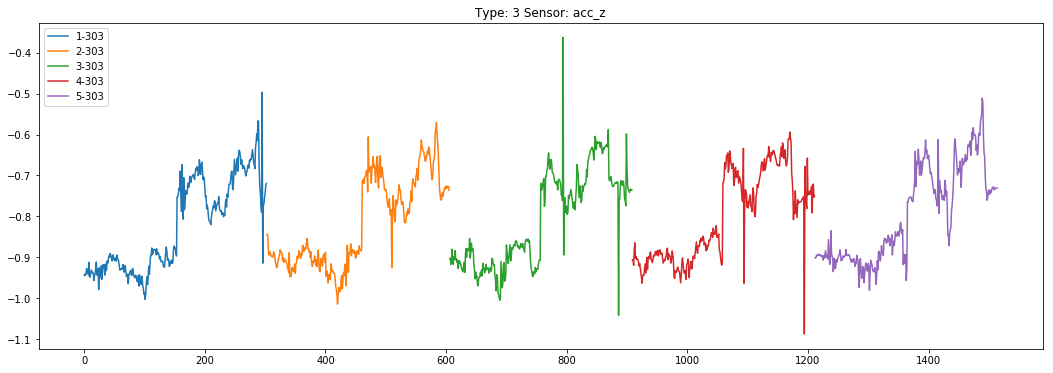

User_2


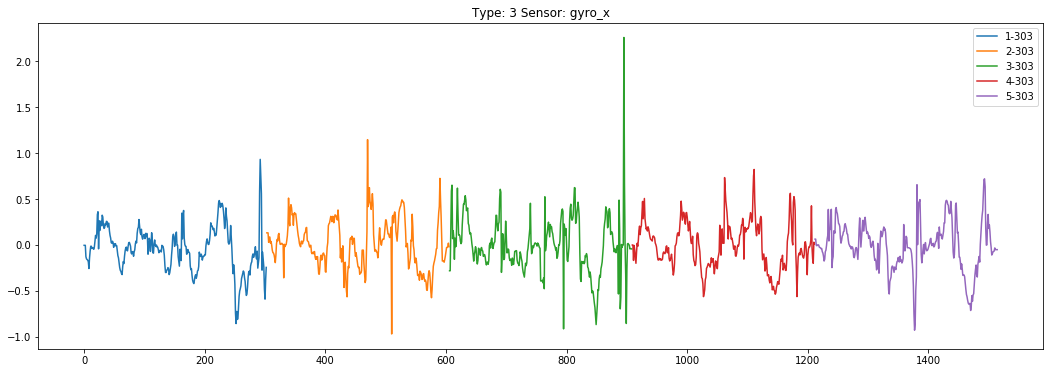

User_2


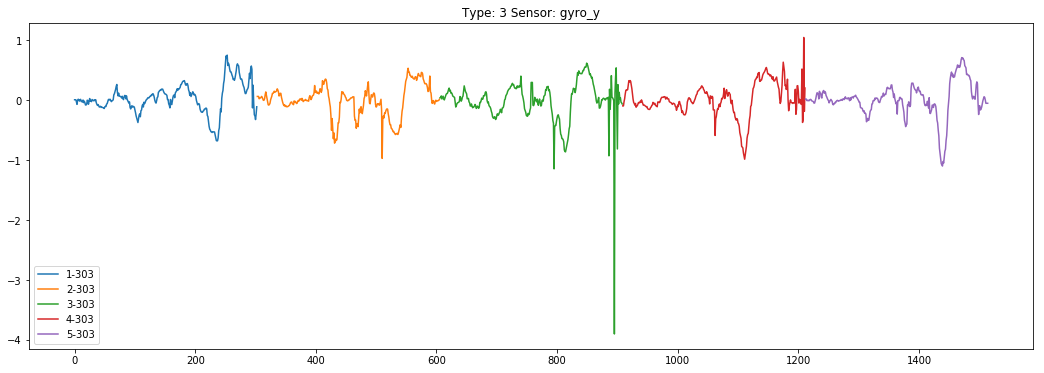

User_2


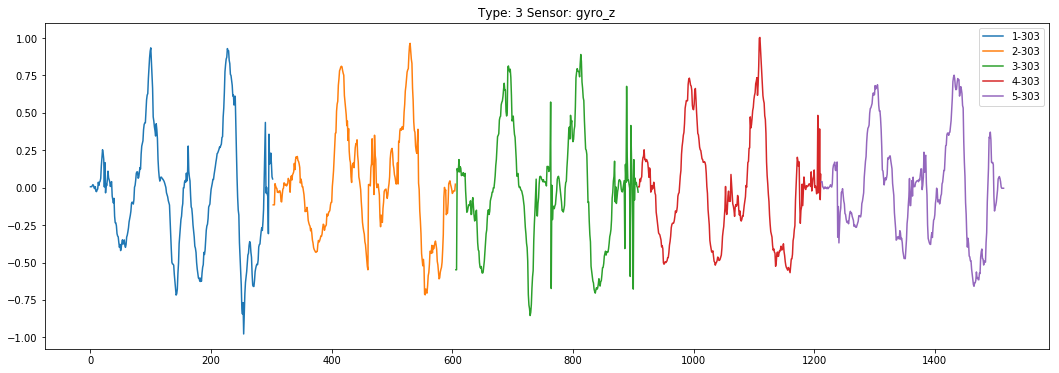

User_2


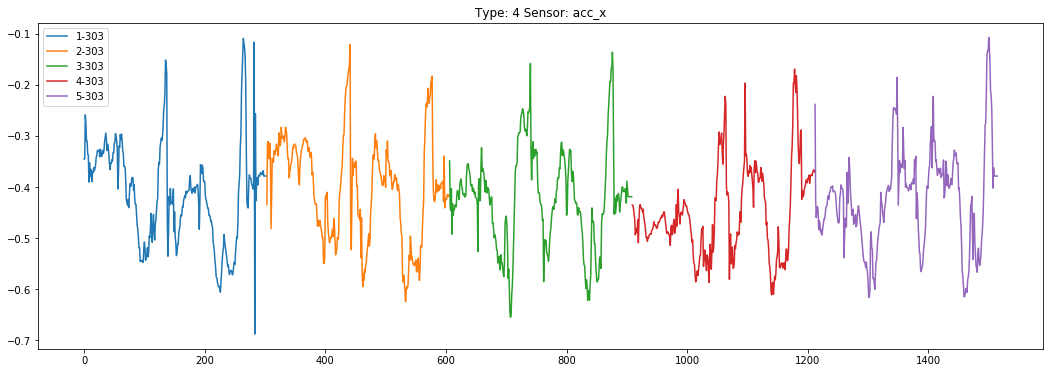

User_2


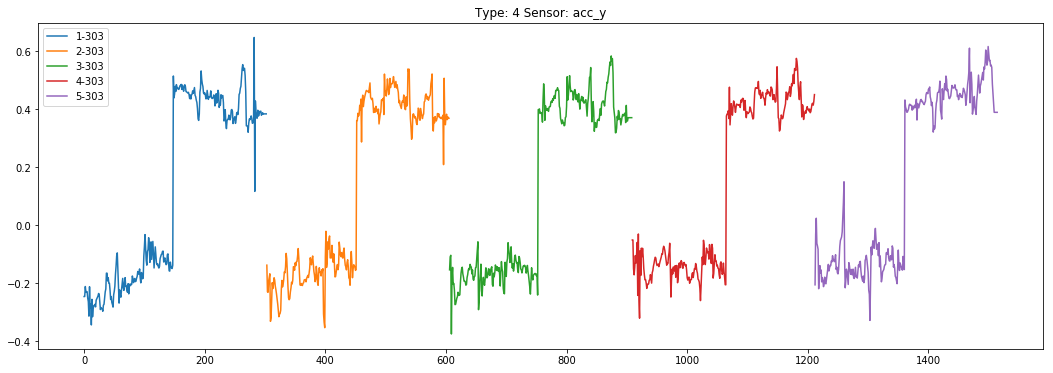

User_2


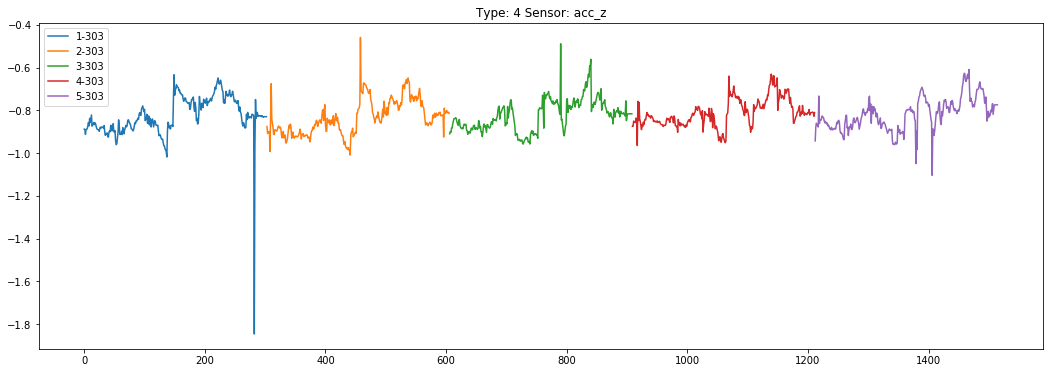

User_2


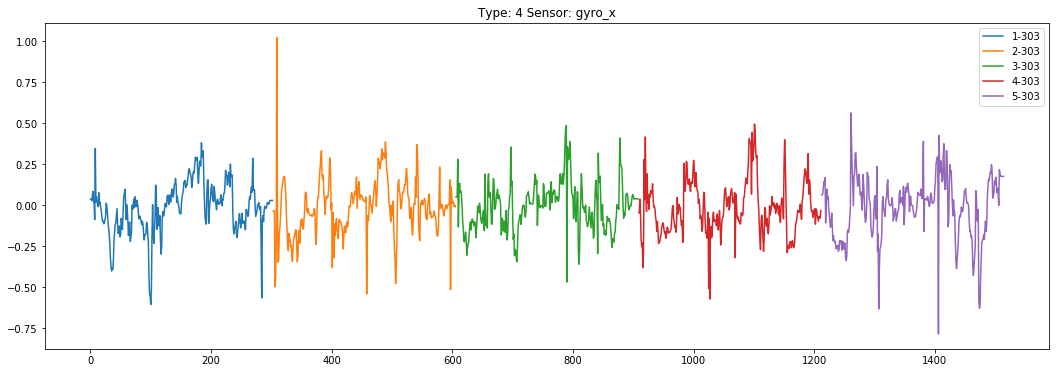

User_2


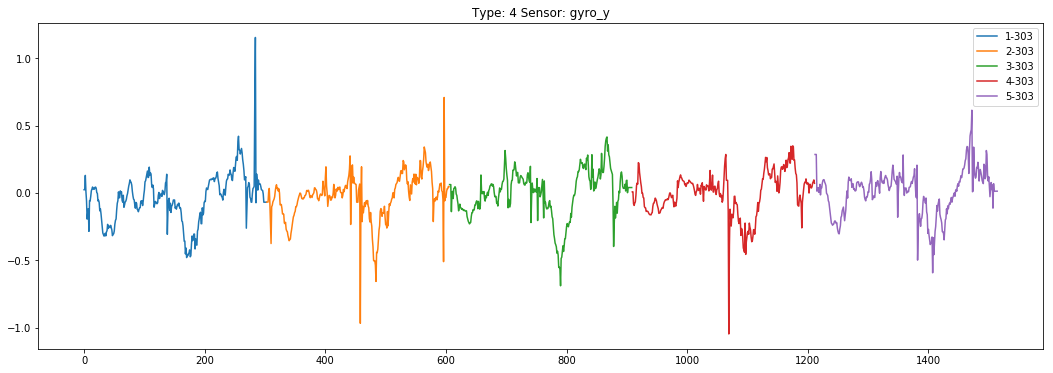

User_2


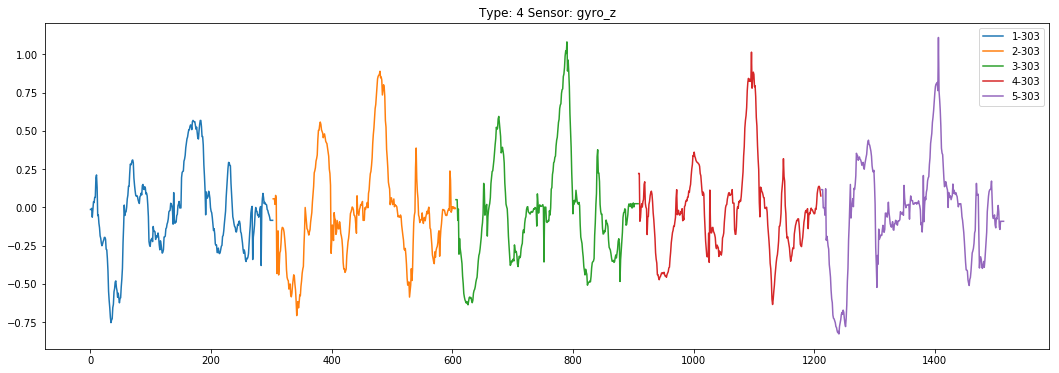

In [8]:
names = df['username'].unique()
seq_lengths = list()
for name in names:
    n = mdf.loc[mdf['name'] == name]    
    types = np.array([1,2,3,4])
    for type_ in types:
        t = n.loc[n['type'] == str(type_)]
        sensors = t['sensor_type'].unique()
        for sensor in sensors:
            s = t
            plt.figure(figsize=(18,6))
            s_index = 0
            for trial in s['trial'].unique():
                nt = s.loc[s['trial'] == trial]
                #nt = nt.sort_values('timestamp')
                label_ = str(trial)+"-"+str(SEQ_LENGTH)
                values = nt.loc[nt['sensor_type'] == sensor].values[0,5:]
                plt.plot(pd.Series(values.astype(float),index=range(s_index,s_index+SEQ_LENGTH)),label=label_)
                #seq_lengths.append(nt[sensor].shape[0])
                s_index += SEQ_LENGTH
            print(name)
            plt.title("Type: %d Sensor: %s"%(type_,sensor))
            plt.legend()
            plt.show()